In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.dates as mdates

age = pd.read_csv('data/datasets_527325_1205308_TimeAge.csv')
gender = pd.read_csv('data/datasets_527325_1205308_TimeGender.csv')
province = pd.read_csv('data/datasets_527325_1205308_TimeProvince.csv')

# Age

In [2]:
print(age.head())
print(age.tail())

         date  time  age  confirmed  deceased
0  2020-03-02     0   0s         32         0
1  2020-03-02     0  10s        169         0
2  2020-03-02     0  20s       1235         0
3  2020-03-02     0  30s        506         1
4  2020-03-02     0  40s        633         1
           date  time  age  confirmed  deceased
814  2020-05-31     0  40s       1521         3
815  2020-05-31     0  50s       2039        15
816  2020-05-31     0  60s       1405        39
817  2020-05-31     0  70s        725        80
818  2020-05-31     0  80s        498       131


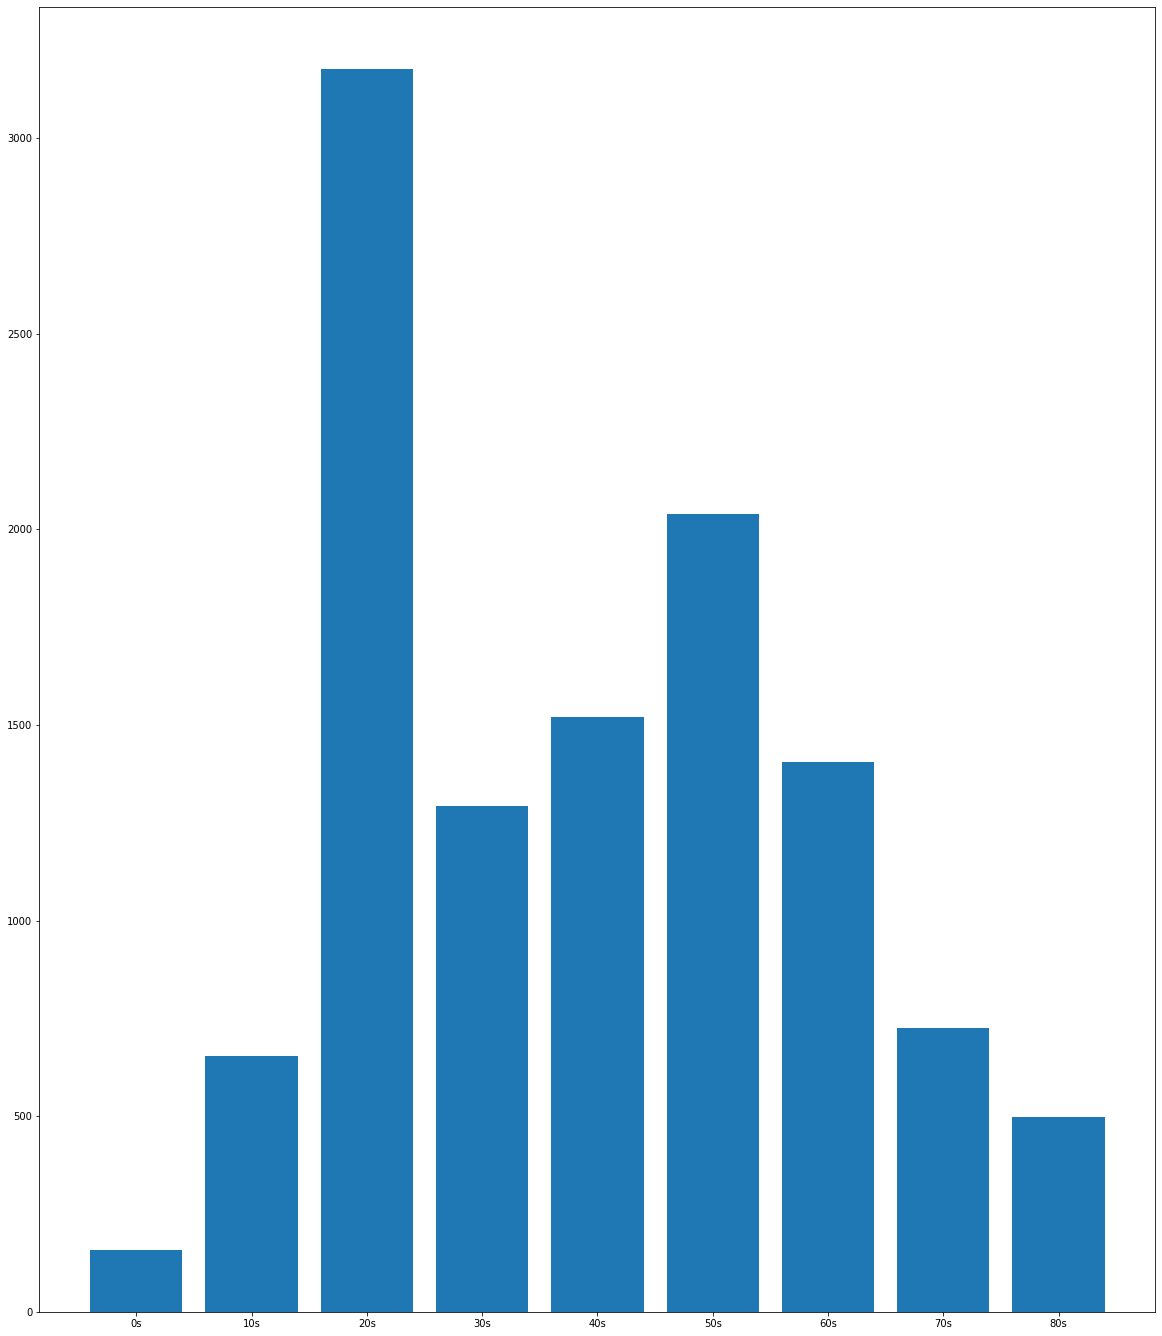

In [3]:
fig, ax = plt.subplots(figsize=(20,24))
bar = ax.bar(age['age'], age['confirmed'])



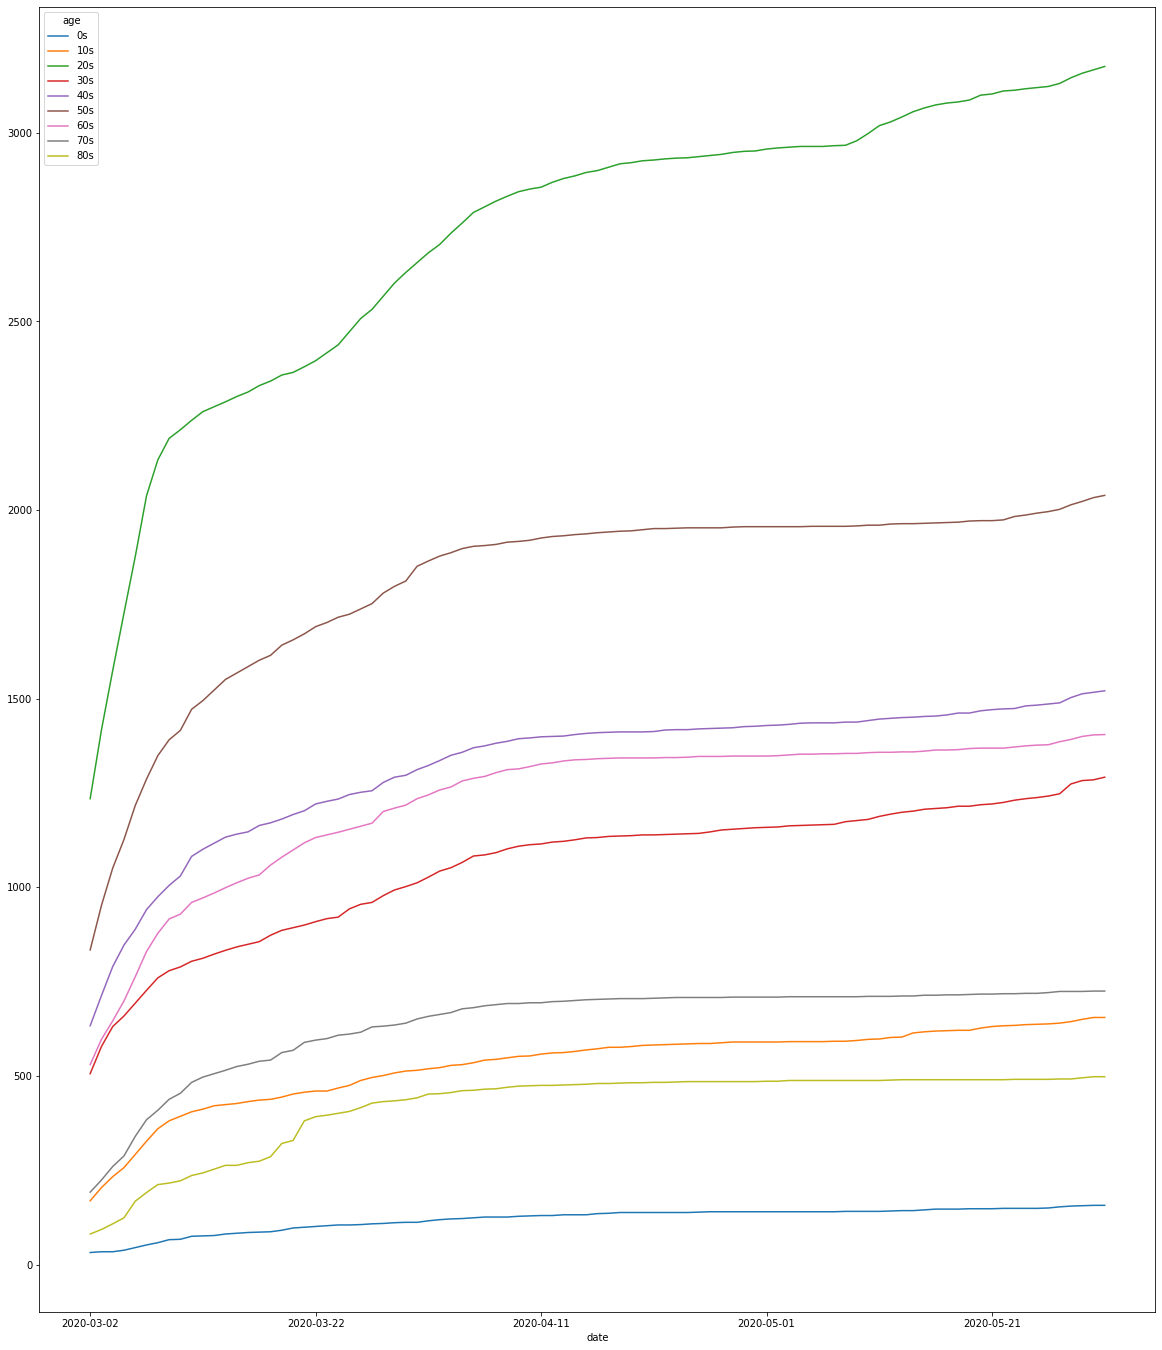

In [4]:
# 連續圖
# plot with each age
age.groupby(['date','age'])['confirmed'].sum() .unstack('age', fill_value=0).plot(legend=True, figsize=(20,24))

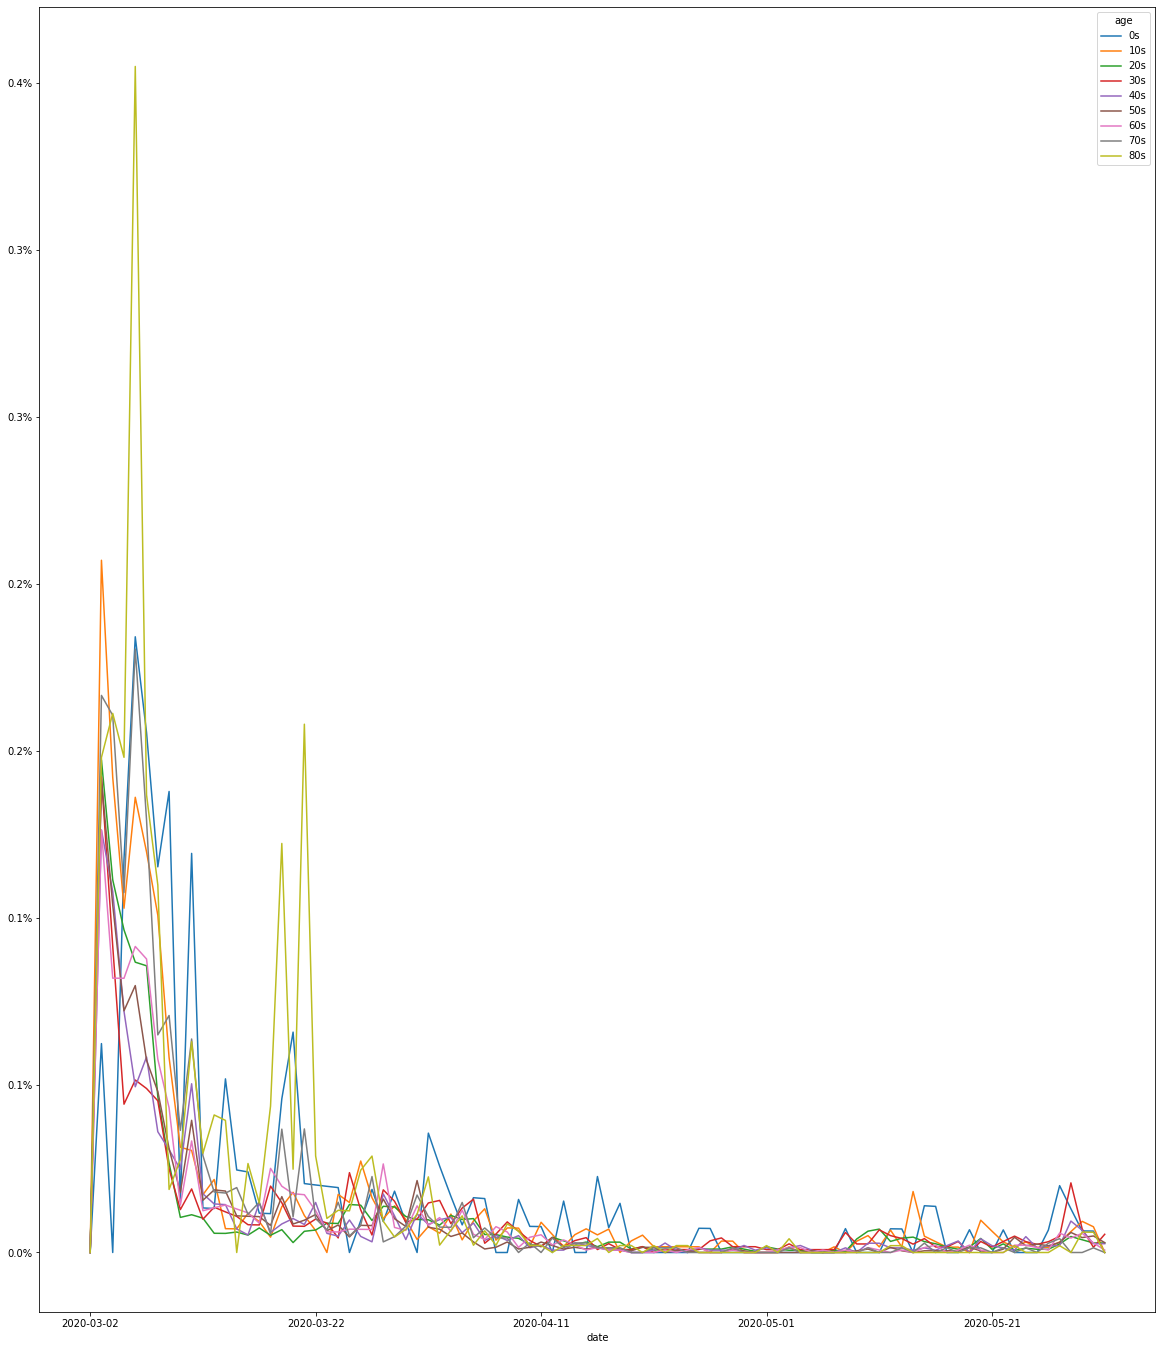

In [80]:
# confirmed growth rate
for title in age['age'].unique():
    age.loc[age['age']==title, 'confirmed_GrowthRate']=age.loc[age['age']==title, 'confirmed'].pct_change()

age.groupby(['date','age'])['confirmed_GrowthRate'].sum() .unstack('age', fill_value=0).plot(legend=True, figsize=(20,24))
plt.gca().set_yticklabels(['{:.1f}%'.format(x) for x in plt.gca().get_yticks()]) 

ax.set_xticks(ax.get_xticks()[::11])

分析結果：確診成長率在一開始的高峰後漸趨平緩。

(-1.1101312118398505,
 1.1004824404439097,
 -1.1110854962322252,
 1.1076991119832709)

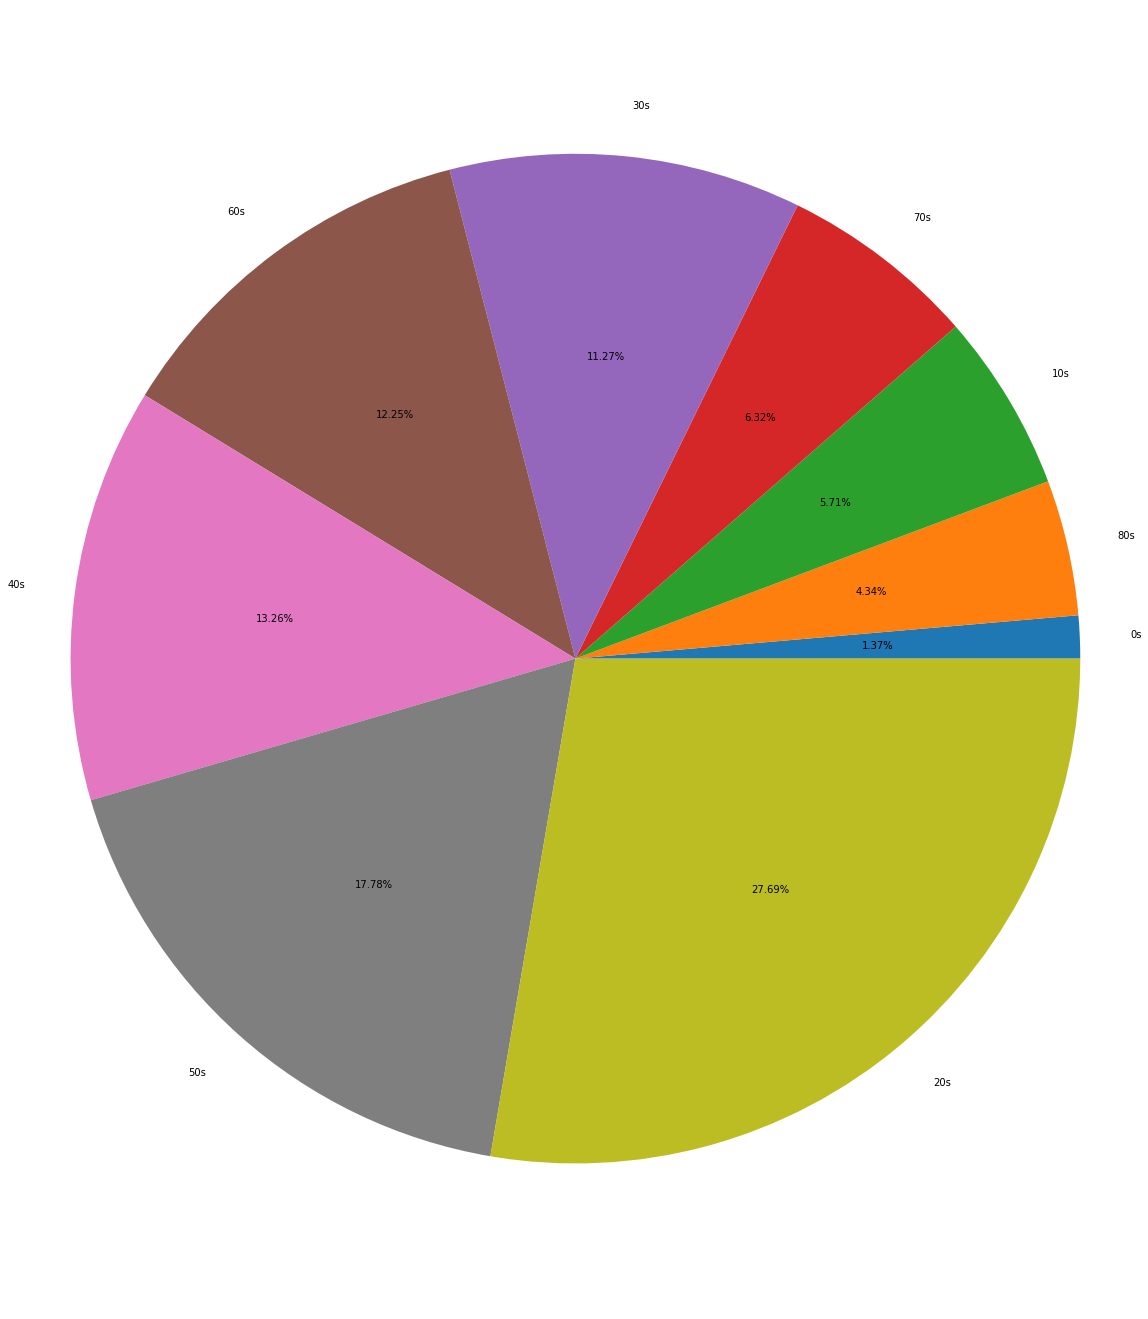

In [6]:
# pie plot
fig, ax = plt.subplots(figsize=(20,24))
order = pd.DataFrame()
order['age'] = age['age'].unique()
size = list(age.loc[age['date'] == '2020-05-31', 'confirmed'])
order['size'] = size
order = order.sort_values(by=['size'])

ax.pie(order['size'], labels=order['age'], autopct='%.2f%%')
plt.axis('equal')


20s確診率較高，可能與生活習慣有關。

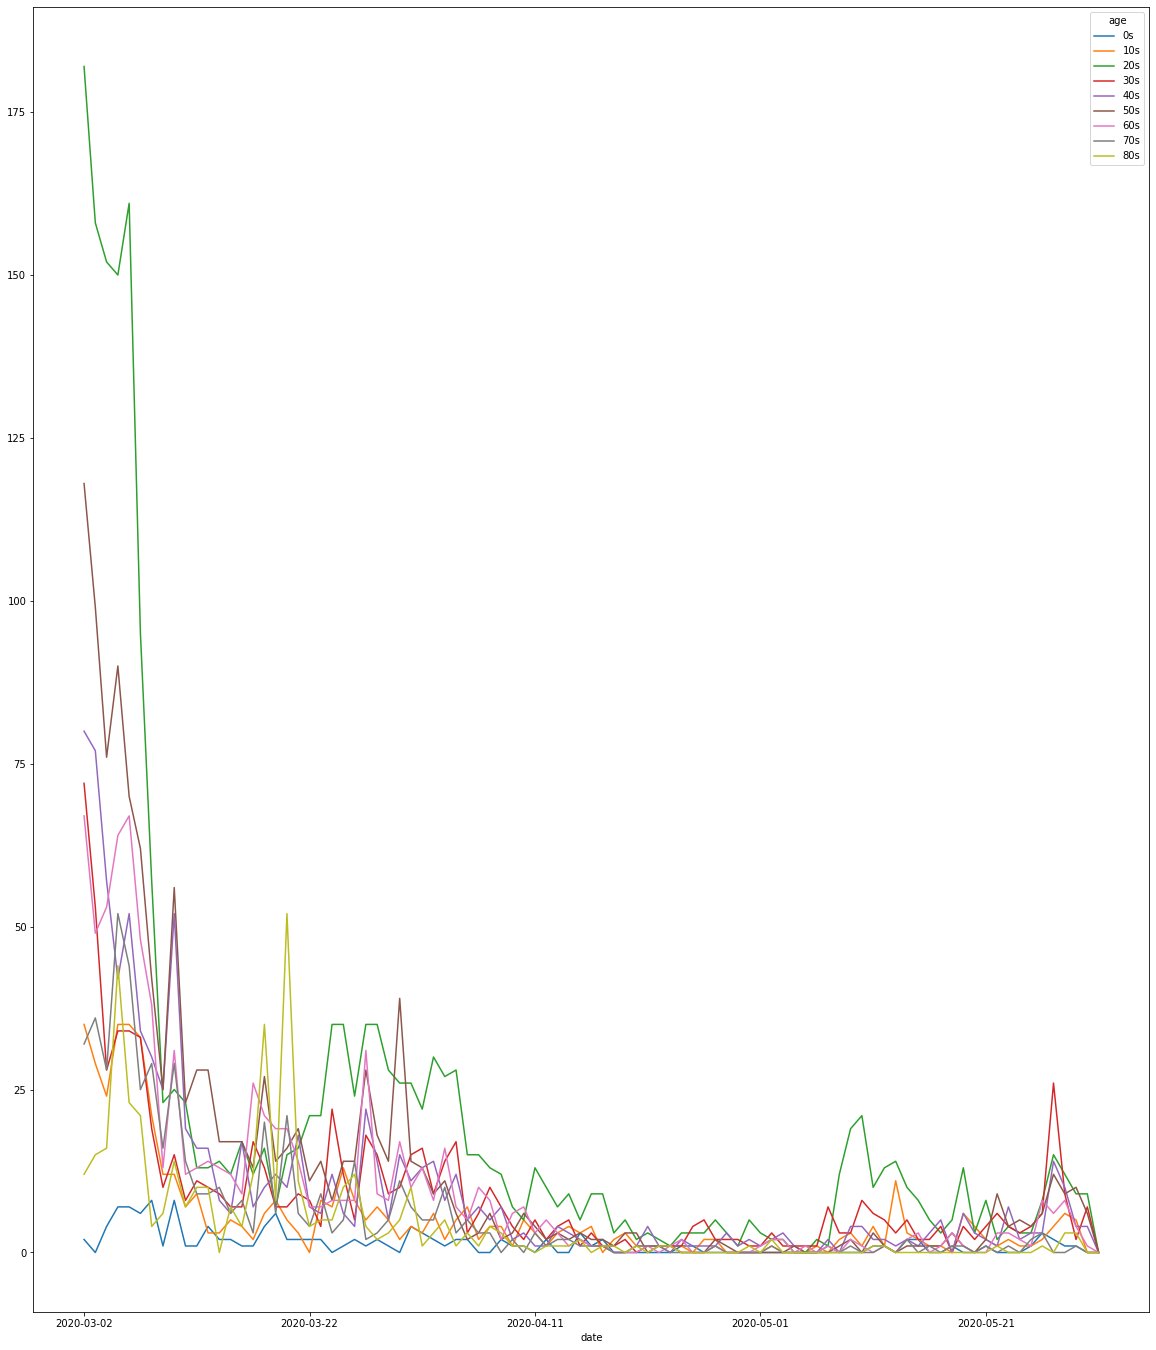

In [77]:
# daily confirmed
for title in age['age'].unique():
    day = age.loc[age['age']==title, 'confirmed']
    age.loc[age['age']==title, 'daily_confirmed'] = day.shift(-1) - day

age.groupby(['date','age'])['daily_confirmed'].sum() .unstack('age', fill_value=0).plot(legend=True, figsize=(20,24))

幾乎都是20s族群爆發，可能年輕人活動範圍較廣泛。

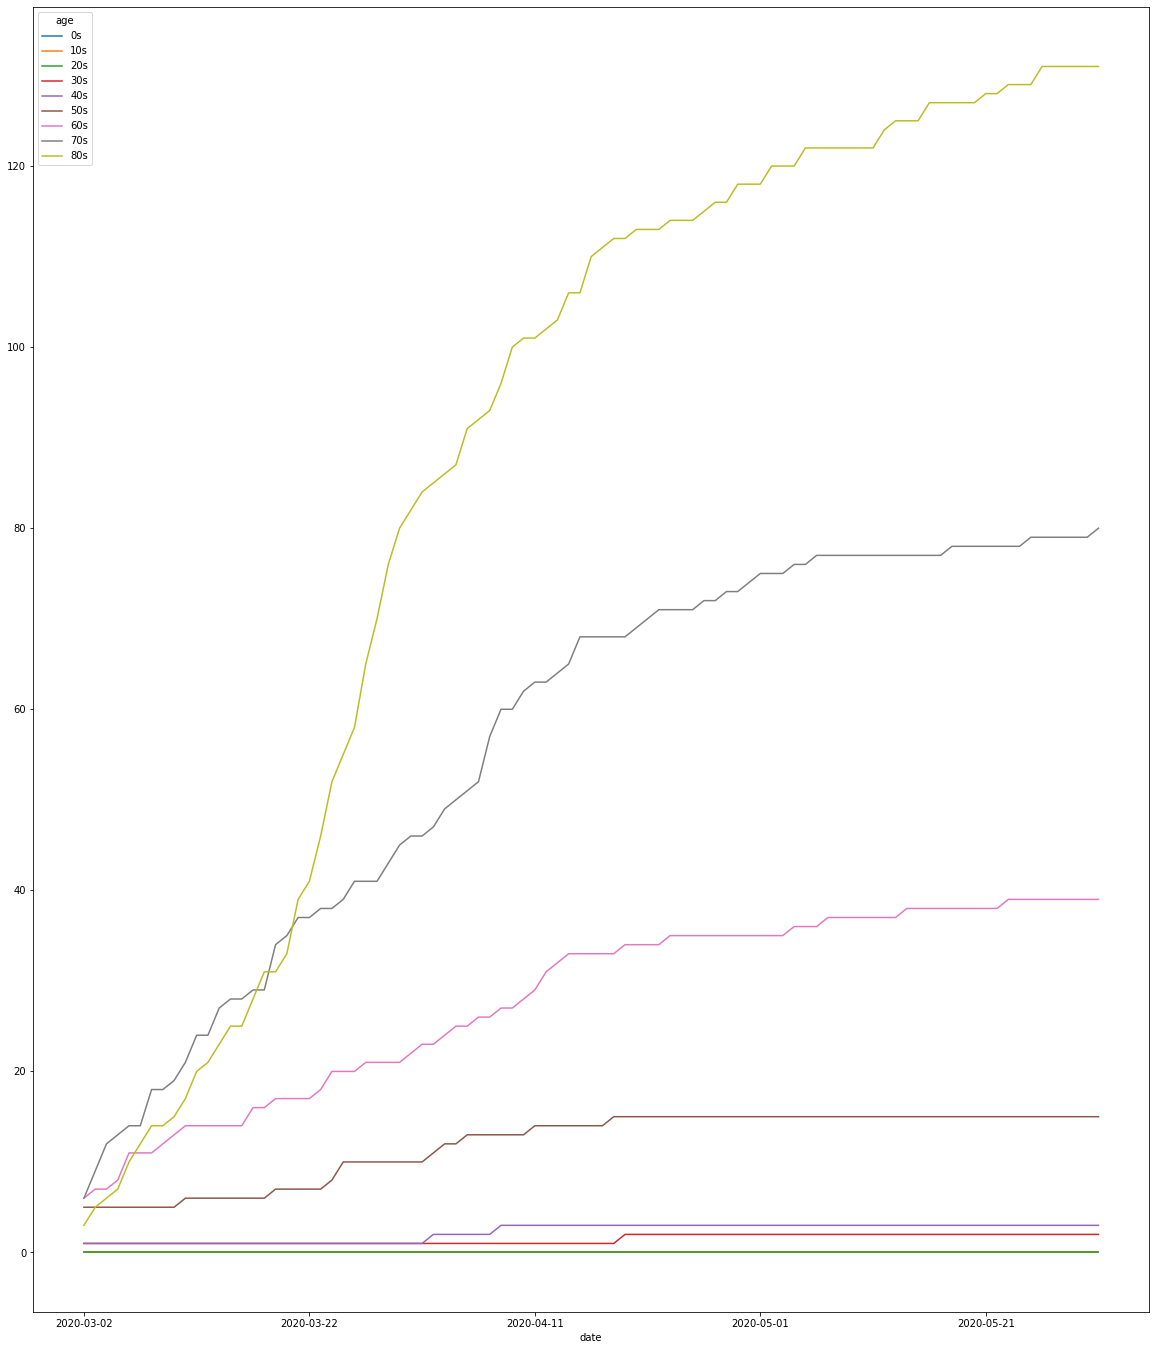

In [8]:
# 連續圖
# plot with each age
age.groupby(['date','age'])['deceased'].sum() .unstack('age', fill_value=0).plot(legend=True, figsize=(20,24))

(-1.1106636220207033,
 1.1005077915247954,
 -1.11197772151131,
 1.1122252083611295)

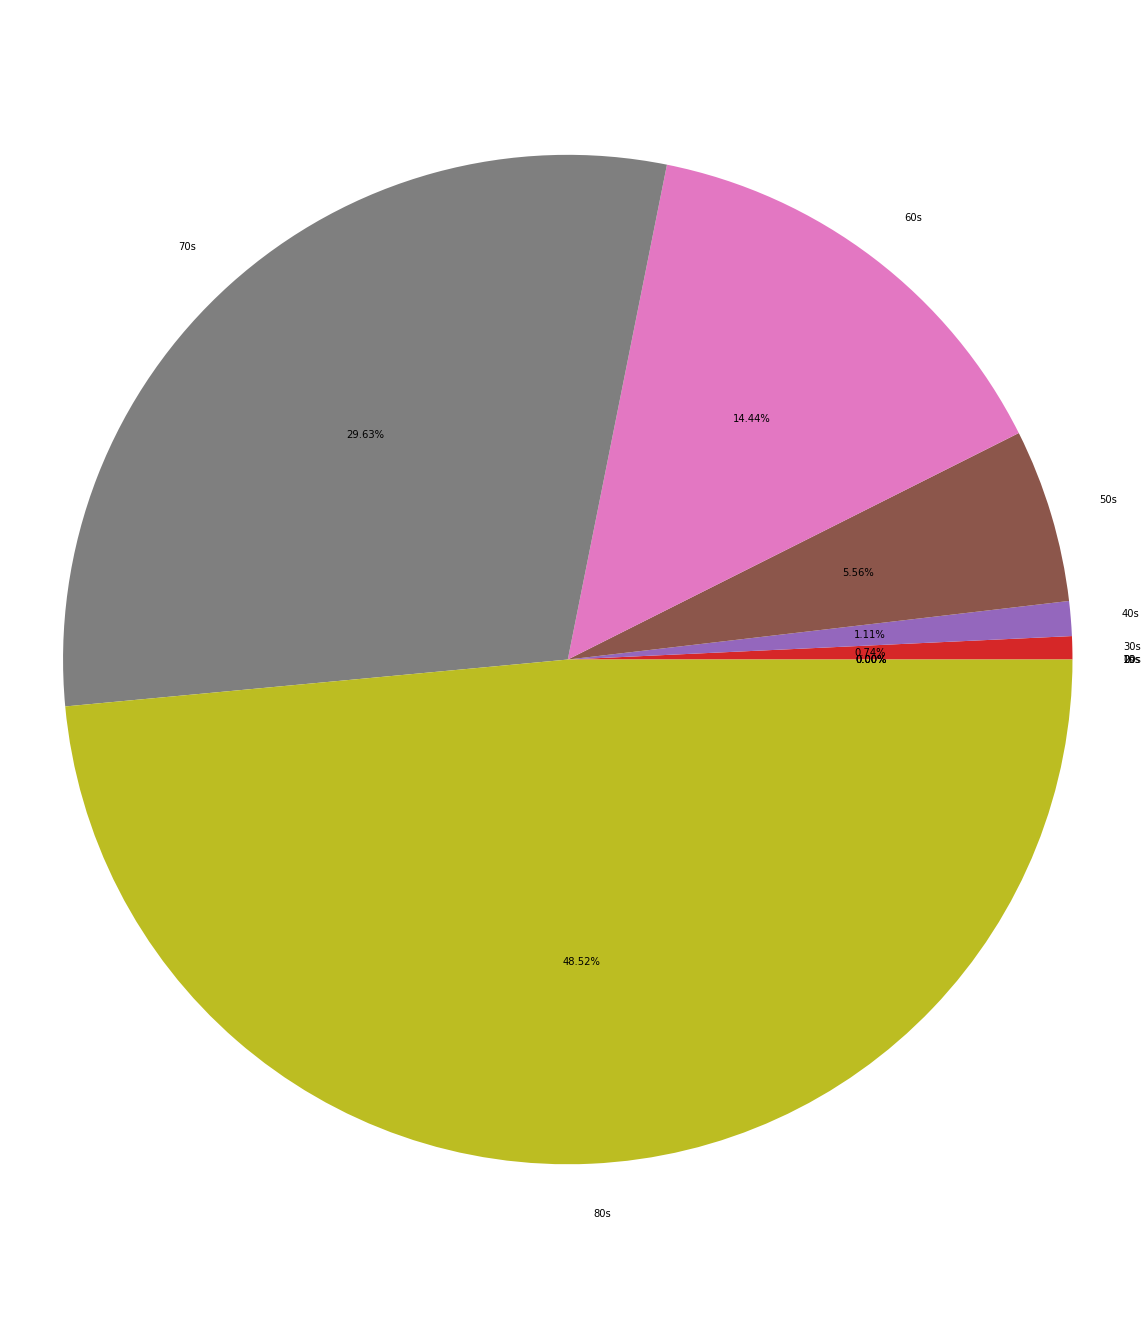

In [9]:
# pie plot
fig, ax = plt.subplots(figsize=(20,24))
order = pd.DataFrame()
order['age'] = age['age'].unique()
size = list(age.loc[age['date'] == '2020-05-31', 'deceased'])
order['size'] = size
order = order.sort_values(by=['size'])

ax.pie(order['size'], labels=order['age'], autopct='%.2f%%')
plt.axis('equal')

年紀越大死亡率越高。

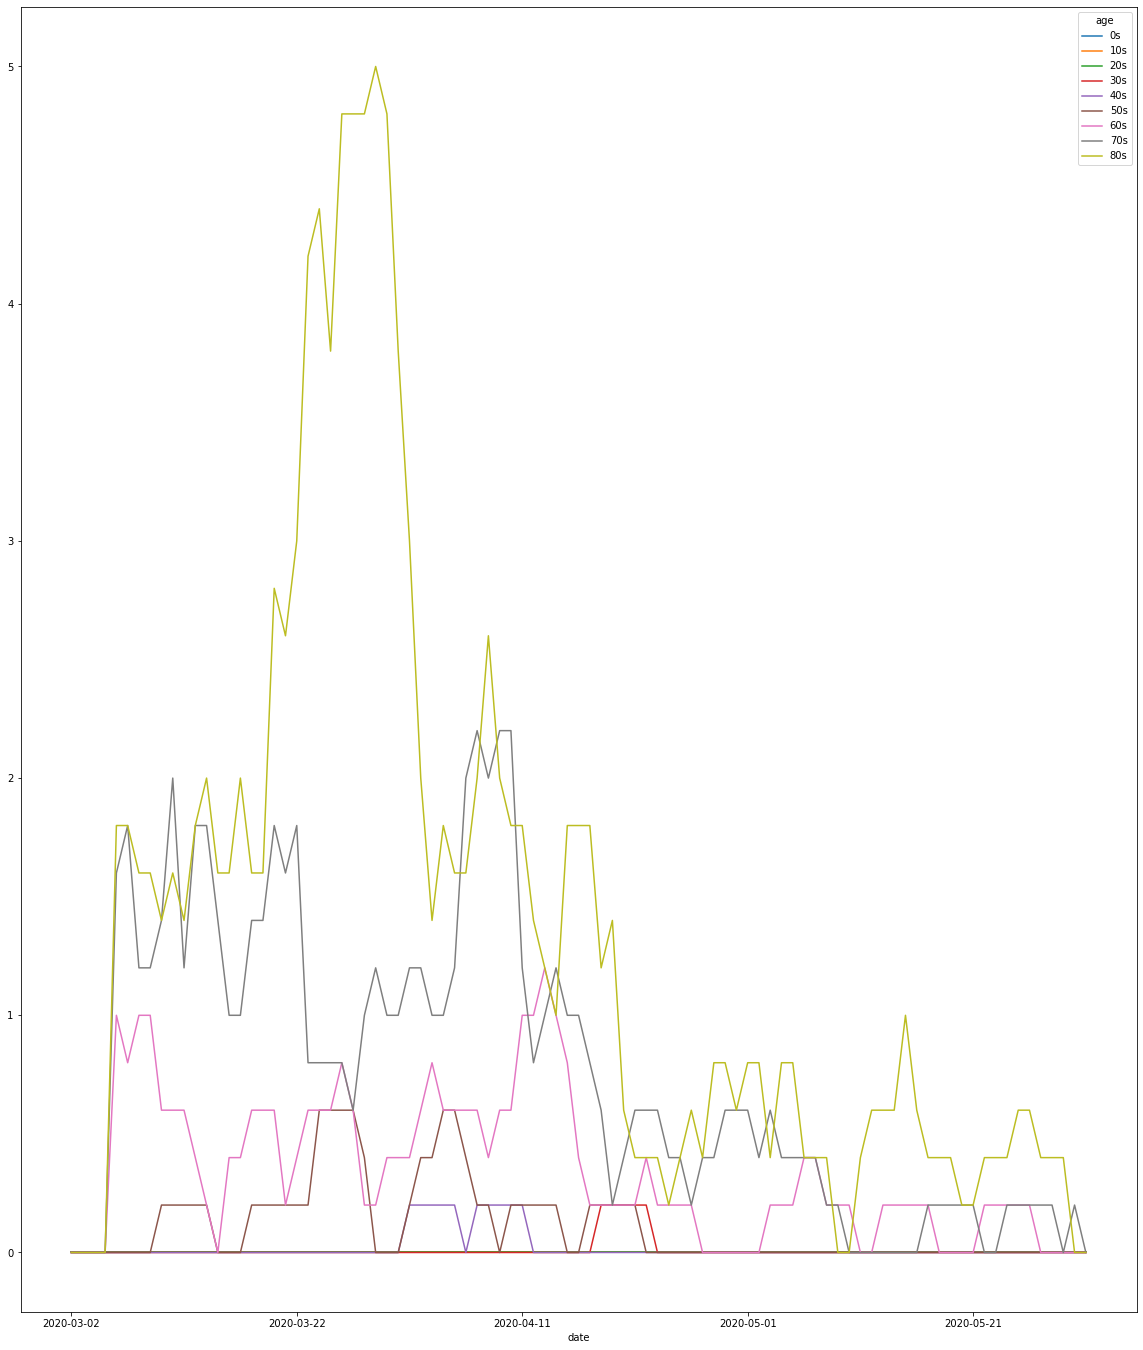

In [87]:
# daily deceased
for title in age['age'].unique():
    day = age.loc[age['age']==title, 'deceased']
    age.loc[age['age']==title, 'daily_deceased'] = day.shift(-1) - day
    age.loc[age['age']==title, 'daily_deceased']=age.loc[age['age']==title, 'daily_deceased'].rolling(5).mean()


age.groupby(['date','age'])['daily_deceased'].sum() .unstack('age', fill_value=0).plot(legend=True, figsize=(20,24))

daily deceased取5天的moving_average，老年人死亡數較年輕人高。

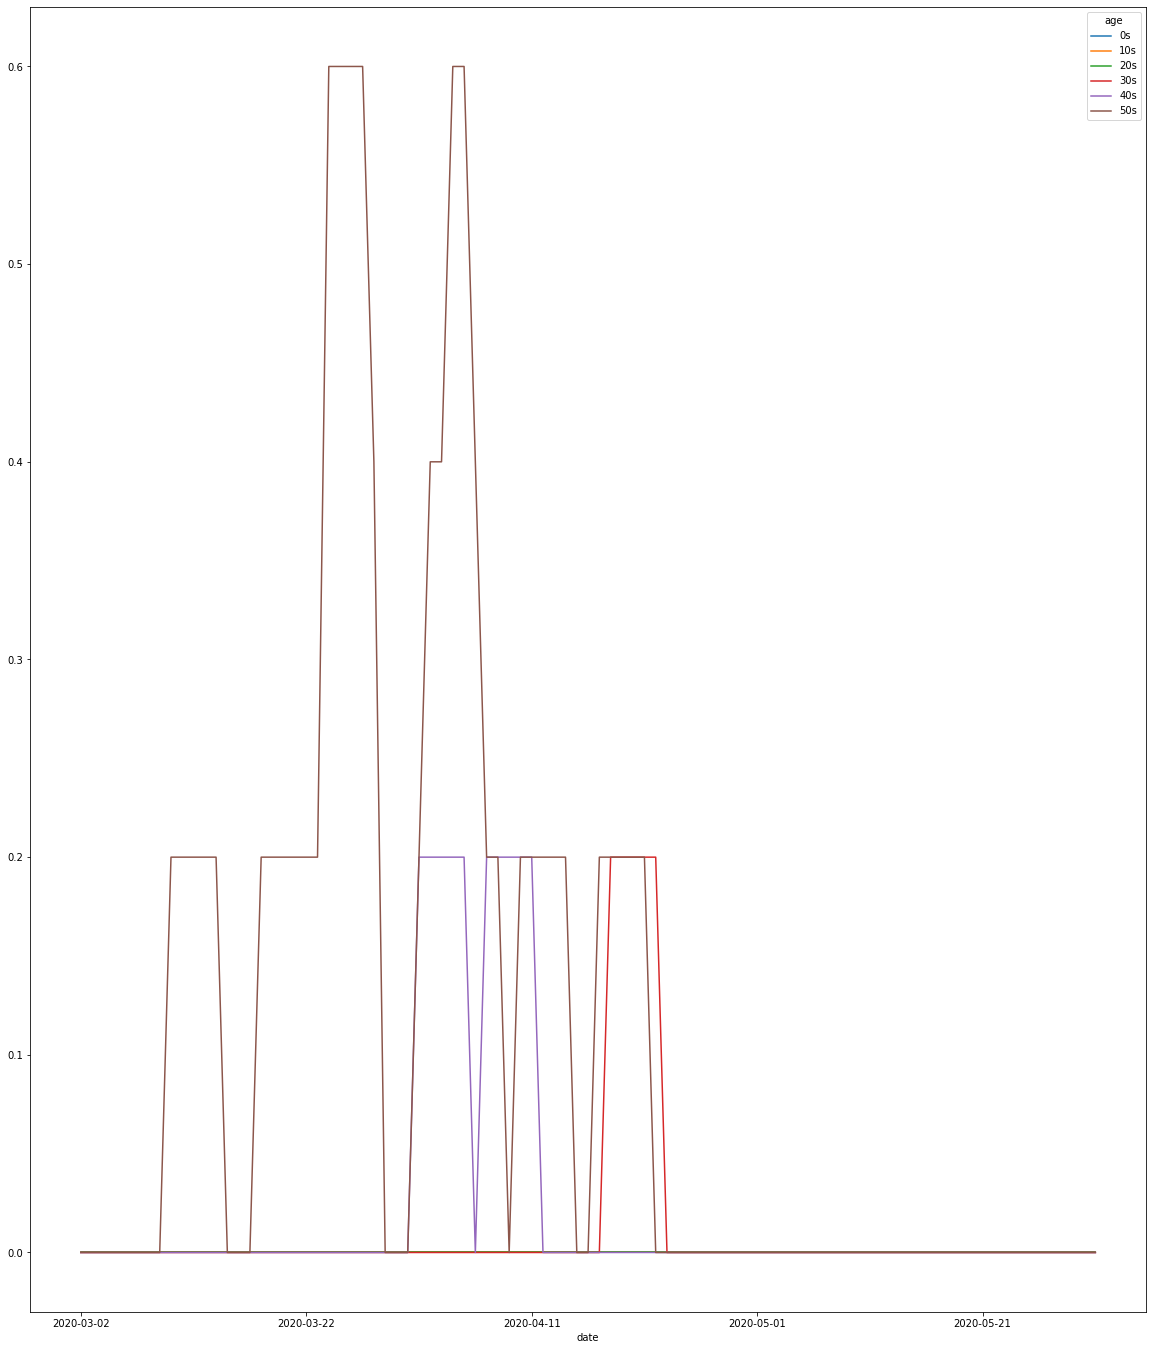

In [90]:
young = age[(age['age']!='80s') & (age['age']!='70s') & (age['age']!='60s')]
young.groupby(['date','age'])['daily_deceased'].sum() .unstack('age', fill_value=0).plot(legend=True, figsize=(20,24))

年輕族群daily deceased取5天的moving_average。年紀超過30之後開始有死亡病例。

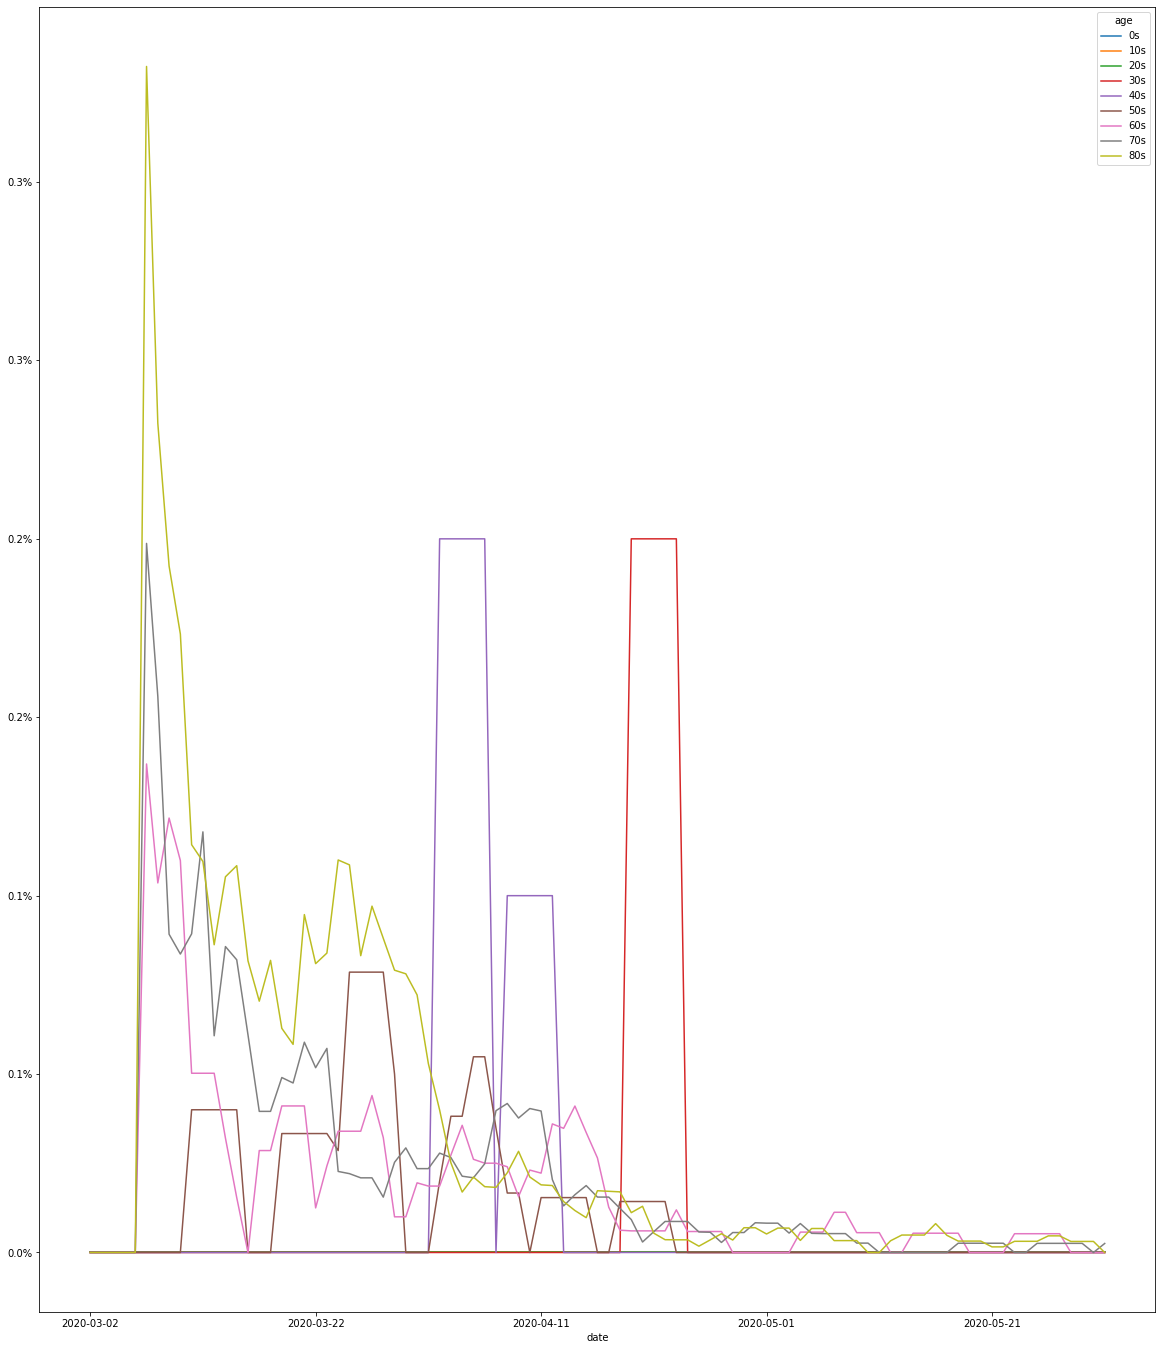

In [86]:
# deceased growth rate (logistic function)
for title in age['age'].unique():
    age.loc[age['age']==title, 'deceased_GrowthRate']=age.loc[age['age']==title, 'deceased'].pct_change()
    age.loc[age['age']==title, 'deceased_GrowthRate_sma']=age.loc[age['age']==title, 'deceased_GrowthRate'].rolling(5).mean()

#     age.loc['deceased_GrowthRate_sma'] = age['deceased_GrowthRate'].rolling(5).mean()


age.groupby(['date','age'])['deceased_GrowthRate_sma'].sum() .unstack('age', fill_value=0).plot(legend=True, figsize=(20,24))
plt.gca().set_yticklabels(['{:.1f}%'.format(x) for x in plt.gca().get_yticks()]) 

ax.set_xticks(ax.get_xticks()[::11])

deceased_GrowthRate的moving_average(5天平均)，可以看出老年人死亡死亡增長率漸緩，而30世代年輕人則有異常高峰，對照上表可以究其原因。

## Mortality Rate

   age  mortality_rate
8  80s       26.305221
7  70s       11.034483
6  60s        2.775801
5  50s        0.735655
4  40s        0.197239
3  30s        0.154799
0   0s        0.000000
1  10s        0.000000
2  20s        0.000000


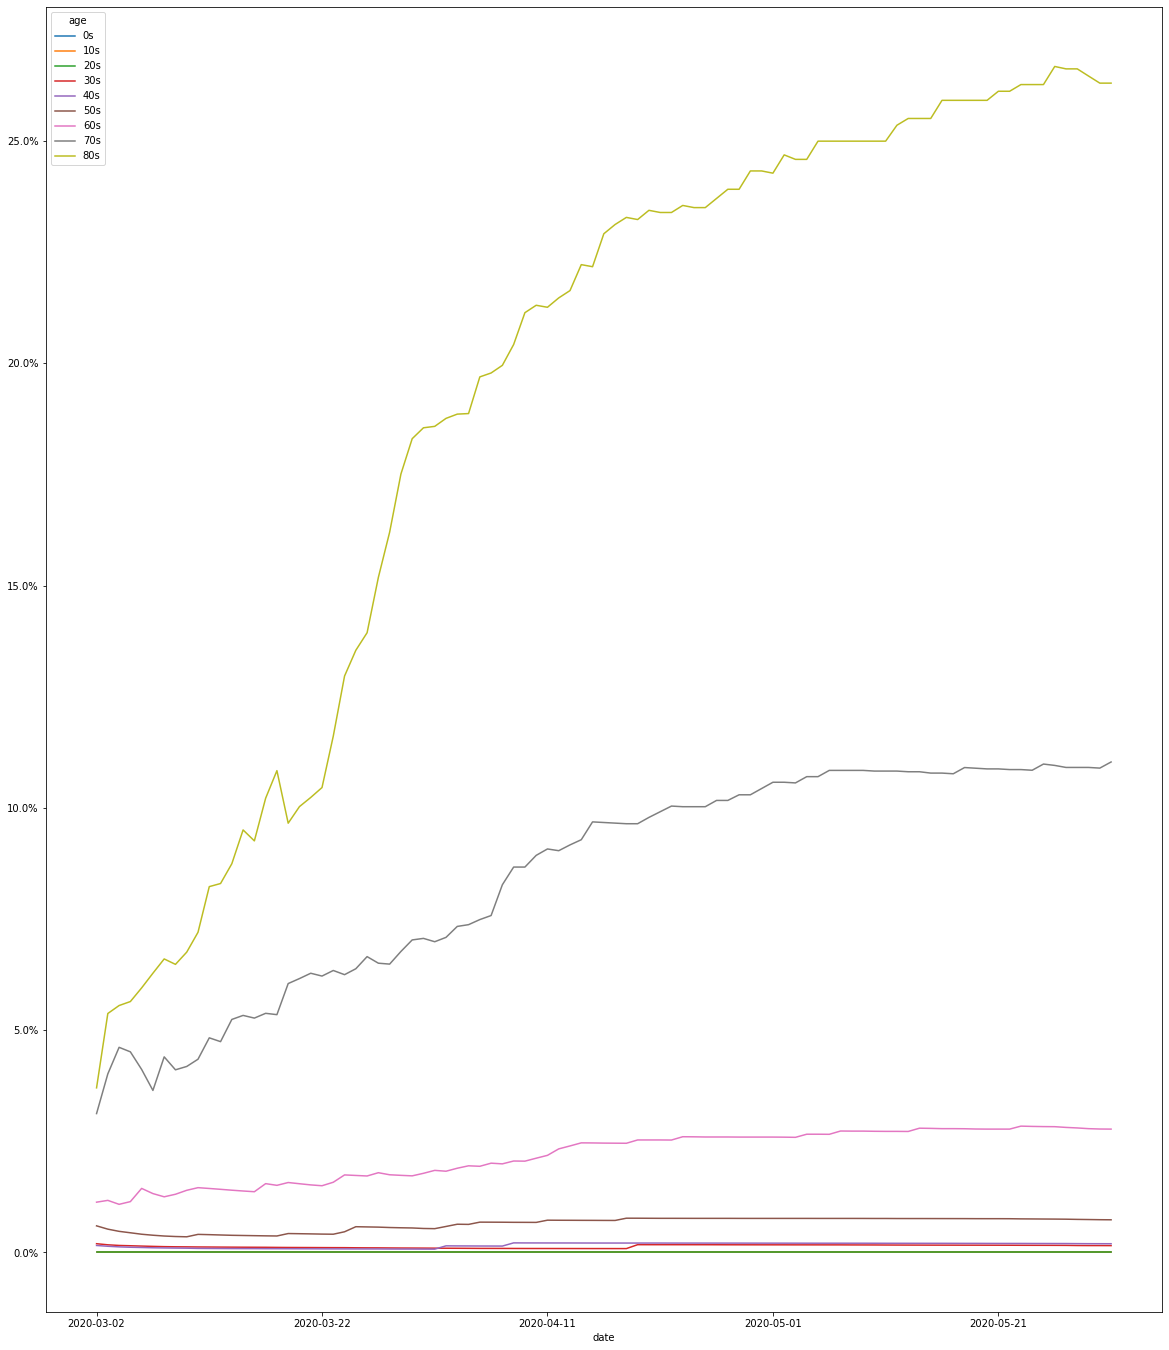

In [61]:
age['mortality_rate'] = age['deceased']/age['confirmed'] * 100
age.groupby(['date','age'])['mortality_rate'].sum() .unstack('age', fill_value=0).plot(legend=True, figsize=(20,24))
plt.gca().set_yticklabels(['{:.1f}%'.format(x) for x in plt.gca().get_yticks()]) 

order = pd.DataFrame()
order['age'] = age['age'].unique()
size = list(age.loc[age['date'] == '2020-05-31', 'mortality_rate'])
order['mortality_rate'] = size
order = order.sort_values(by=['mortality_rate'],ascending=False)
print(order)

表為約2個月間的每100人死亡數，可以看出年齡越大越易死亡，年輕族群甚至沒人在染病期間死亡。
圖為每日(累計死亡數/累計確診數)*100*，即每日各年齡層每百人死亡數。

In [ ]:
order_duration_age = sorted(patient["age_range"].unique())[:-1]
plt.figure(figsize=(12, 8))
sns.boxplot(x="age_range",
            y="duration_days",
            order=order_duration_age,
            hue="state",
            hue_order=["released", "deceased"],
            data=patient)
plt.title("Time from confirmation to release or death", fontsize=16)
plt.xlabel("Age Range", fontsize=16)
plt.ylabel("Days", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Sex

In [12]:
print(gender.head())
print(gender.tail())

         date  time     sex  confirmed  deceased
0  2020-03-02     0    male       1591        13
1  2020-03-02     0  female       2621         9
2  2020-03-03     0    male       1810        16
3  2020-03-03     0  female       3002        12
4  2020-03-04     0    male       1996        20
           date  time     sex  confirmed  deceased
177  2020-05-29     0  female       6643       127
178  2020-05-30     0    male       4780       142
179  2020-05-30     0  female       6661       127
180  2020-05-31     0    male       4795       143
181  2020-05-31     0  female       6673       127


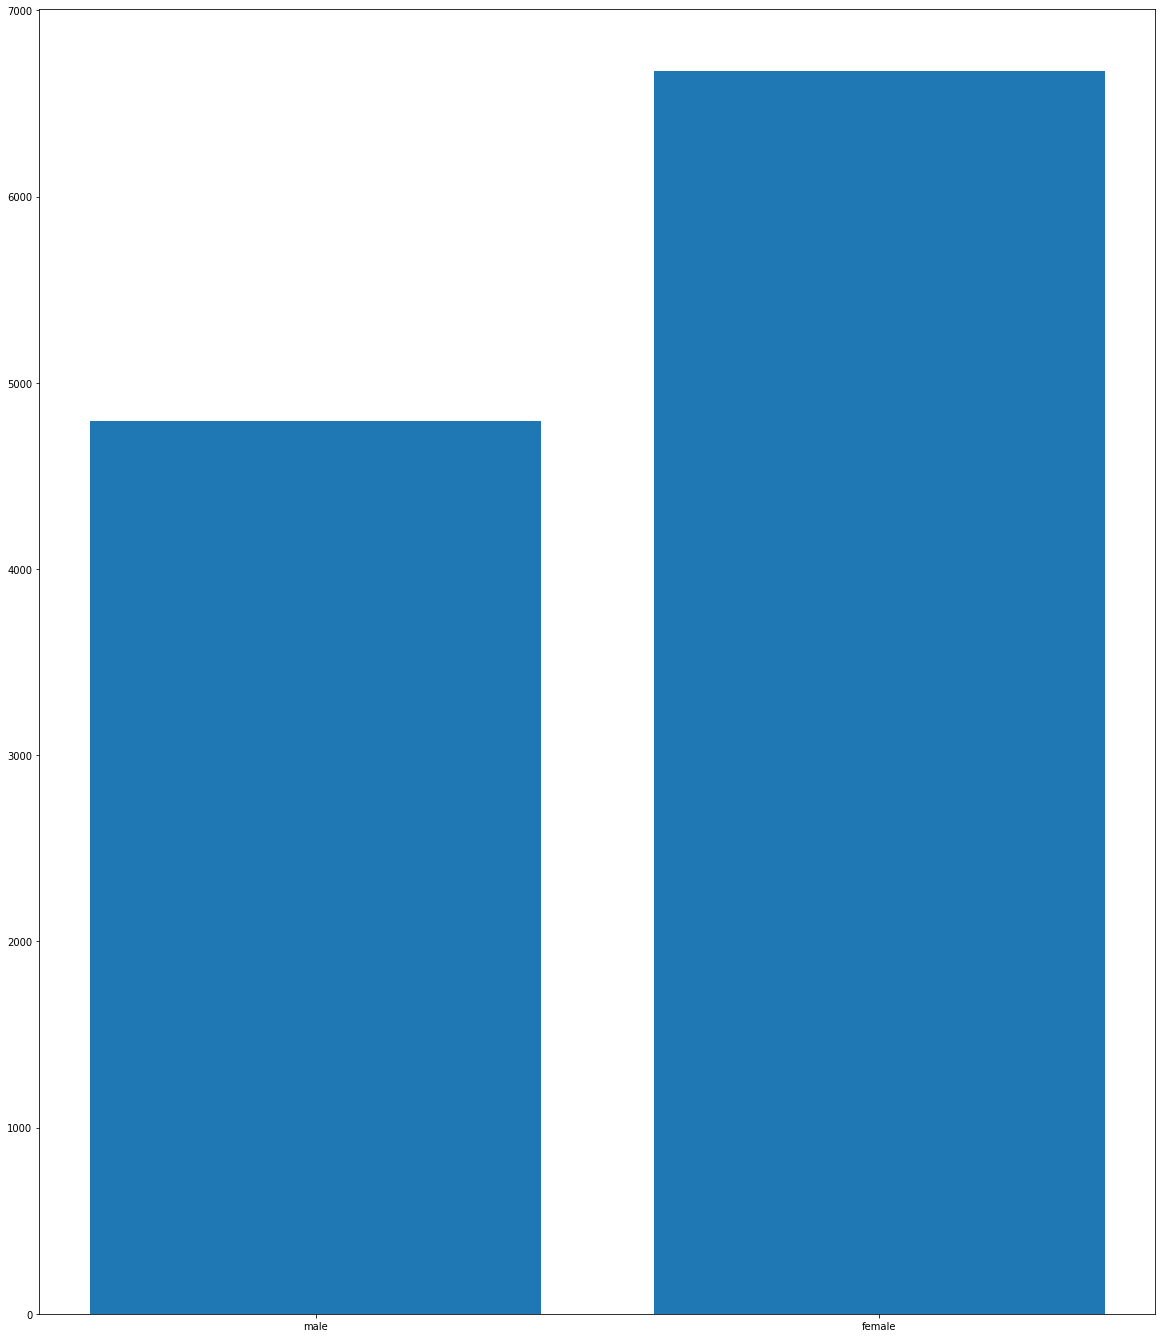

In [13]:
fig, ax = plt.subplots(figsize=(20,24))
sex_bar = ax.bar(gender['sex'], gender['confirmed'])


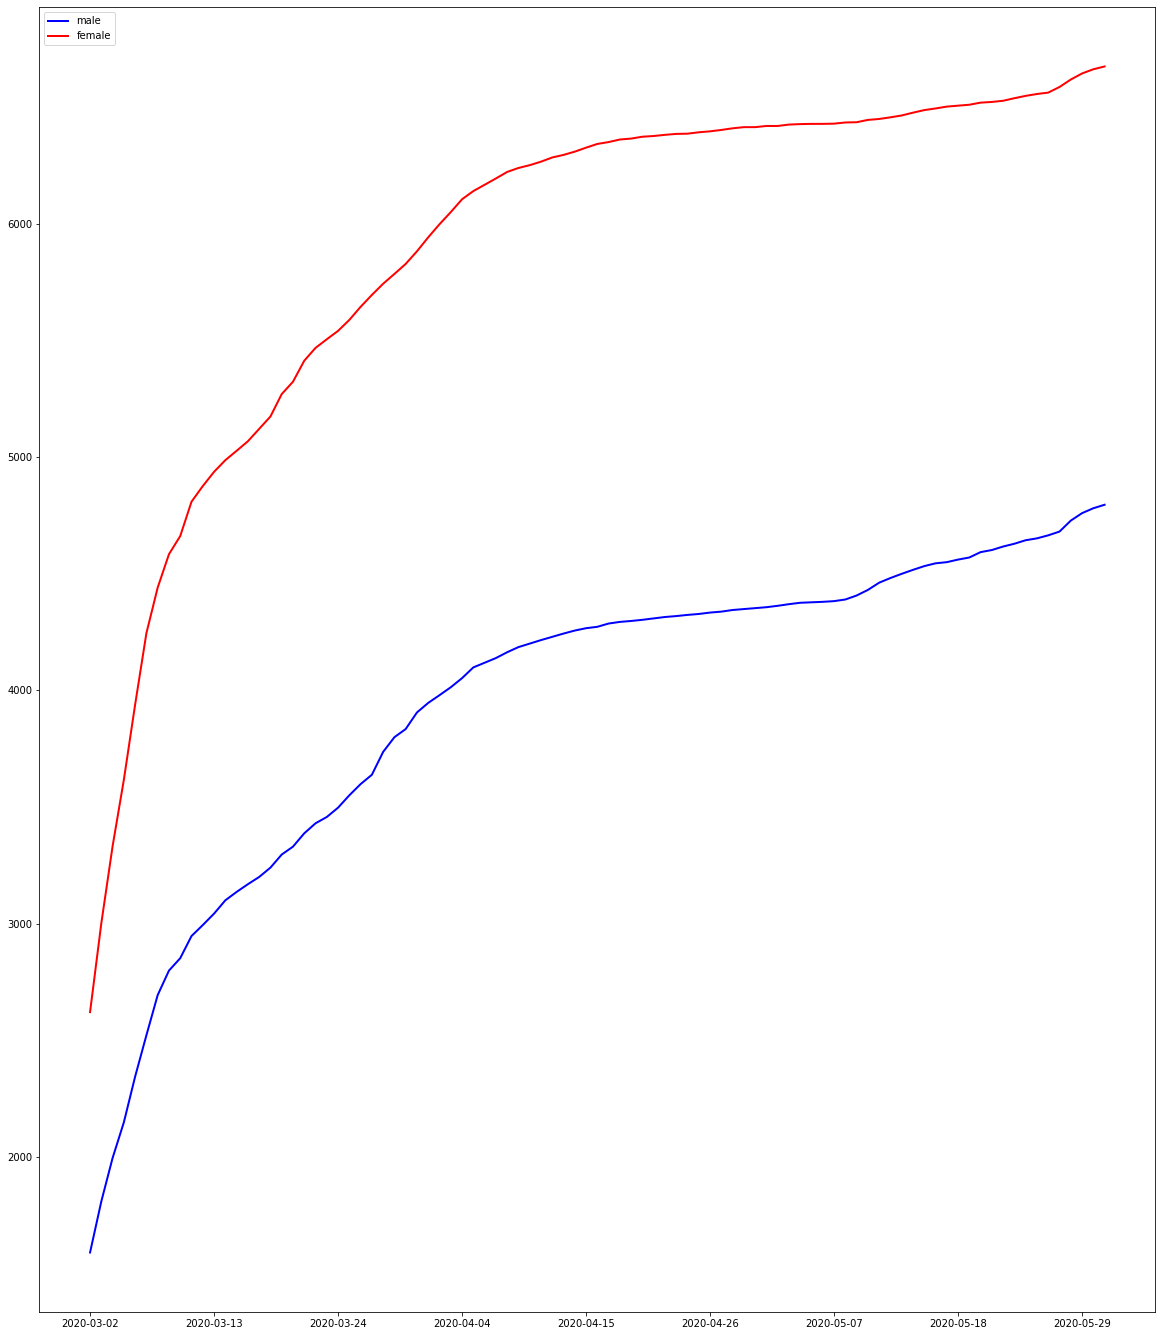

In [14]:
fig, ax = plt.subplots(figsize=(20,24))

# 連續圖
ax.plot(gender.date.unique(), gender.loc[gender['sex'] == 'male', 'confirmed'], color = 'blue', linewidth = 2, label='male')
ax.plot(gender.date.unique(), gender.loc[gender['sex'] == 'female', 'confirmed'], color = 'red', linewidth = 2, label='female')
plt.legend(loc='upper left')
ax.set_xticks(ax.get_xticks()[::11])

女性確診人數較男性高，可能與該地區性別比率影響。(http://www.koreaherald.com/view.php?ud=20191119000682)

(-1.1074926864399264,
 1.1003568246055524,
 -1.1121612160314764,
 1.1249775391696726)

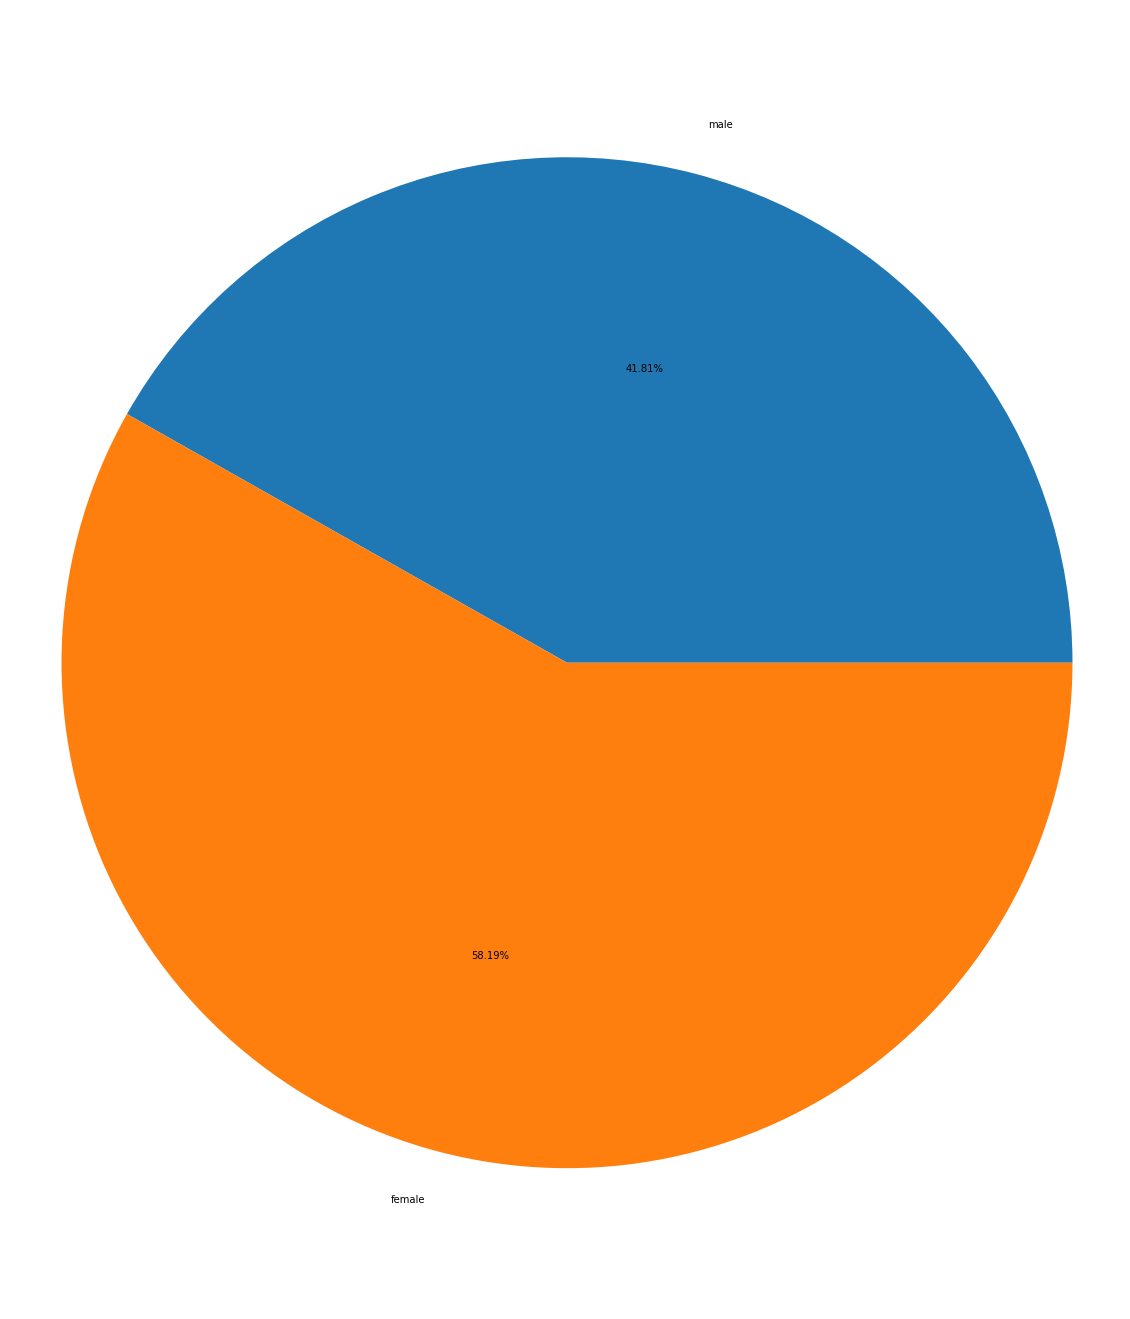

In [15]:
# pie plot
fig, ax = plt.subplots(figsize=(20,24))
order = pd.DataFrame()
order['age'] = gender['sex'].unique()
size = list(gender.loc[gender['date'] == '2020-05-31', 'confirmed'])
order['size'] = size
order = order.sort_values(by=['size'])

ax.pie(order['size'], labels=order['age'], autopct='%.2f%%')
plt.axis('equal')

統計至2020-05-31確診率2者女性較多。

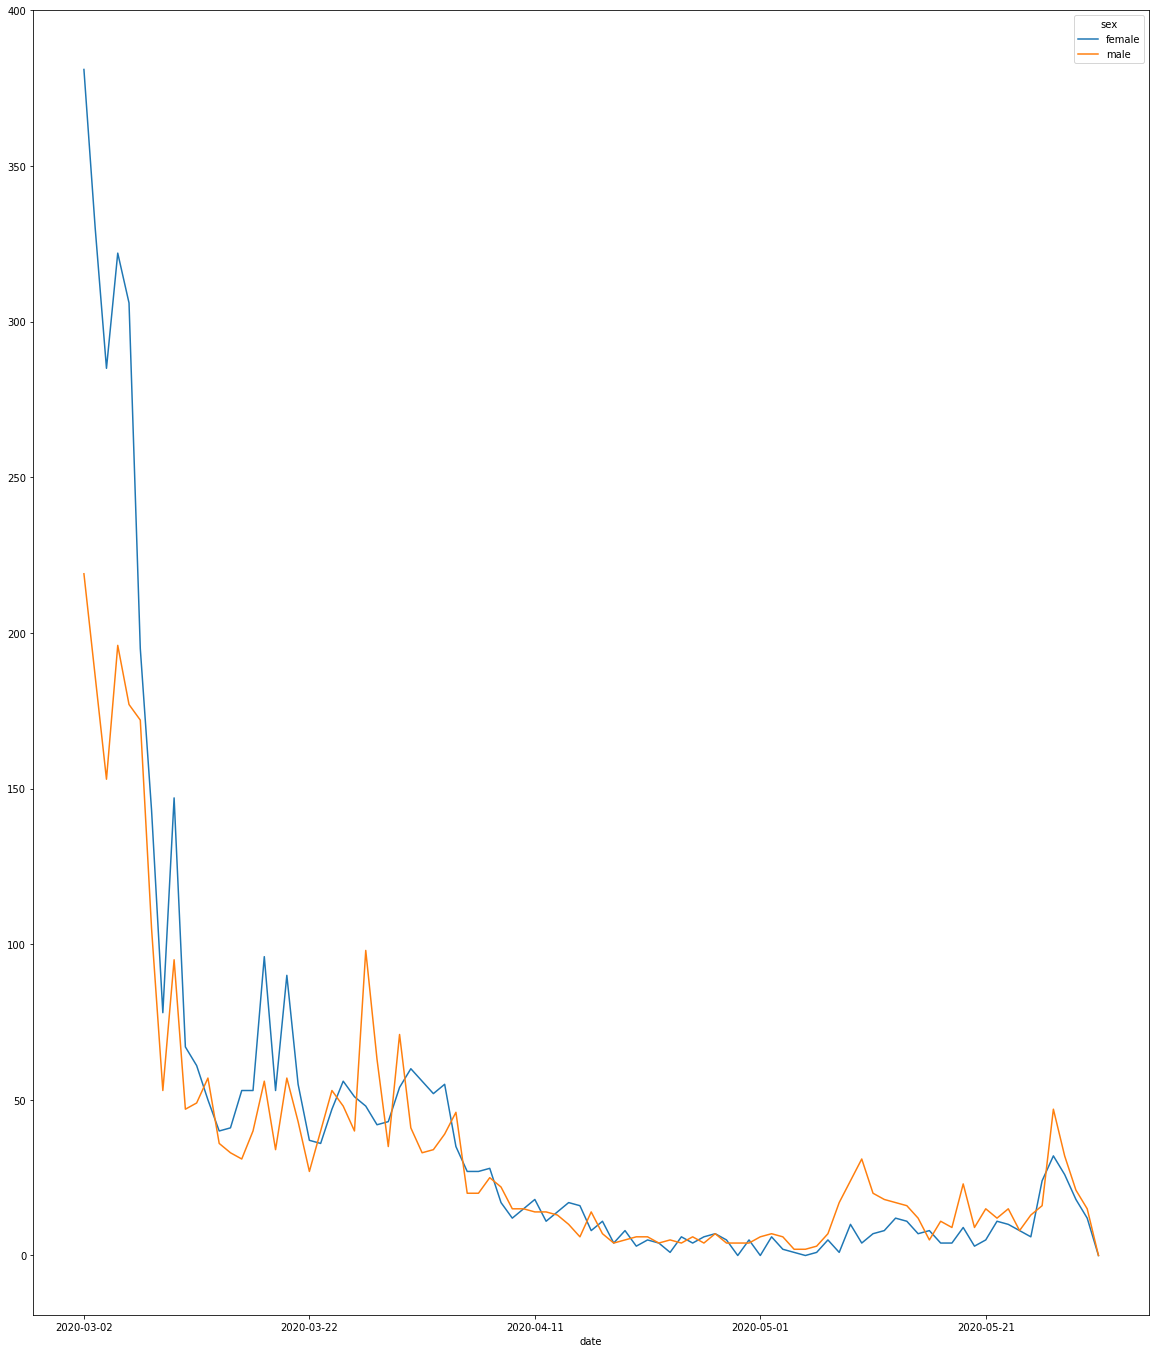

In [16]:
# daily confirmed
for title in gender['sex'].unique():
    day = gender.loc[gender['sex']==title, 'confirmed']
    gender.loc[gender['sex']==title, 'daily_confirmed'] = day.shift(-1) - day

gender.groupby(['date','sex'])['daily_confirmed'].sum() .unstack('sex', fill_value=0).plot(legend=True, figsize=(20,24))

女性確診率較高，因為爆發時女性確診數較多。每日病例可以觀察到並非女性較易確診。

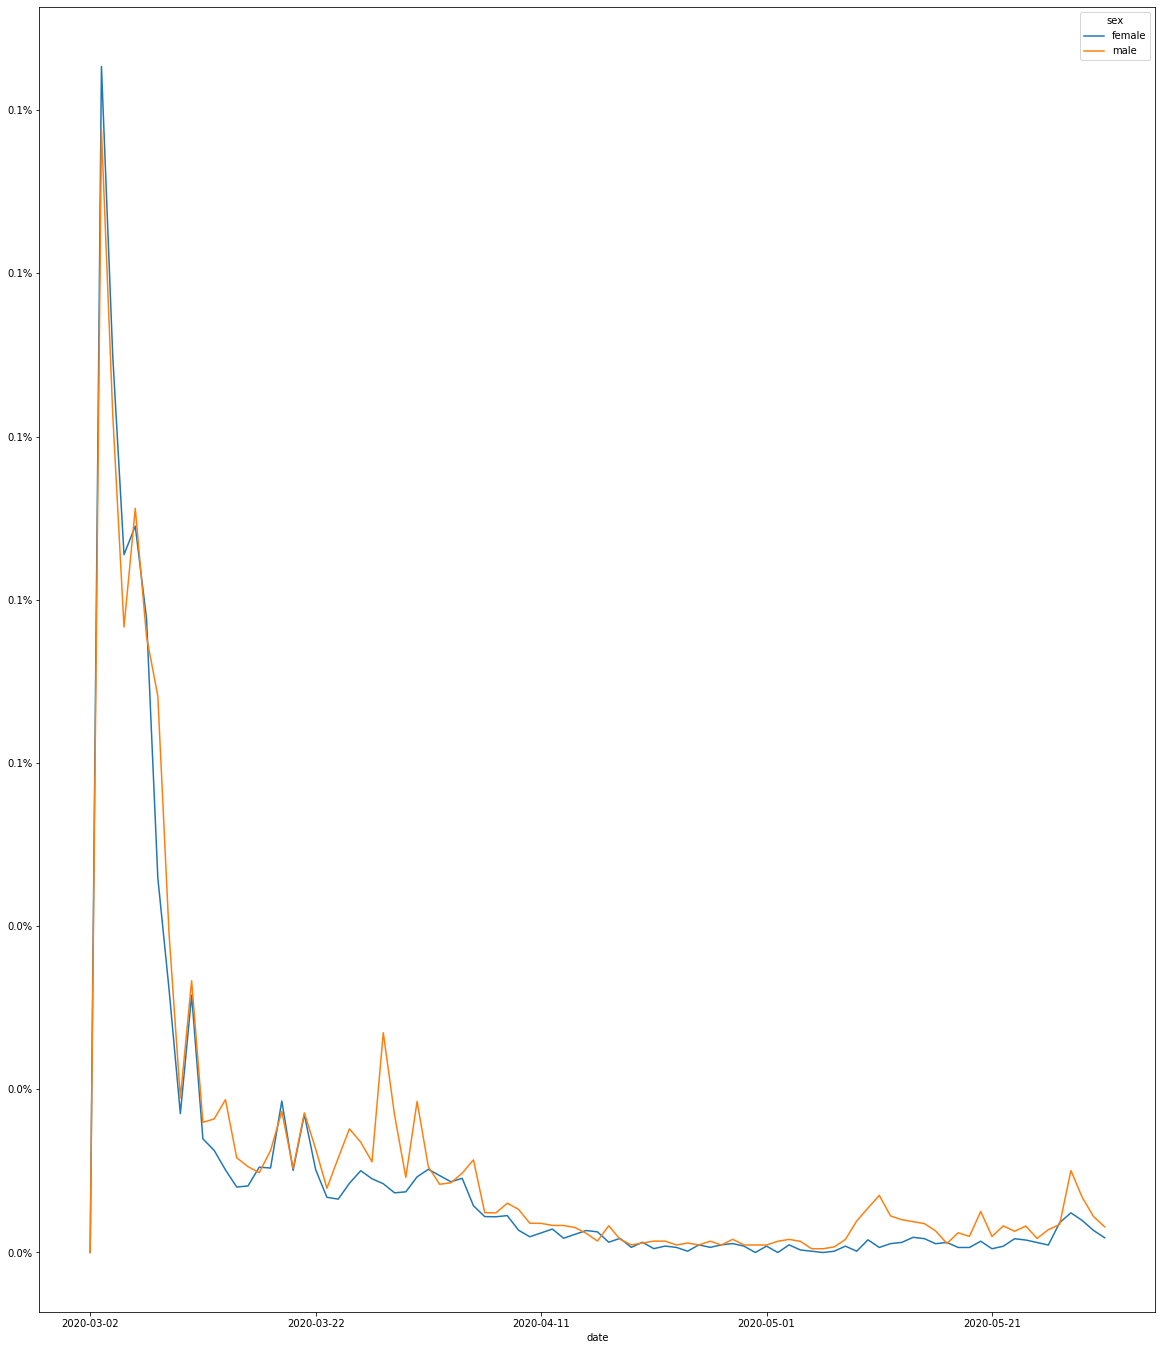

In [98]:
# confirmed growth rate (logistic function)
for title in gender['sex'].unique():
    gender.loc[gender['sex']==title, 'confirmed_GrowthRate']=gender.loc[gender['sex']==title, 'confirmed'].pct_change()
#     gender.loc[gender['sex']==title, 'confirmed_GrowthRate_sma']=gender.loc[gender['sex']==title, 'deceased_GrowthRate'].rolling(5).mean()

#     age.loc['deceased_GrowthRate_sma'] = age['deceased_GrowthRate'].rolling(5).mean()


gender.groupby(['date','sex'])['confirmed_GrowthRate'].sum() .unstack('sex', fill_value=0).plot(legend=True, figsize=(20,24))
plt.gca().set_yticklabels(['{:.1f}%'.format(x) for x in plt.gca().get_yticks()]) 

ax.set_xticks(ax.get_xticks()[::11])

確診增長率兩者同時爆發，隨後漸趨平緩。

## Deceased

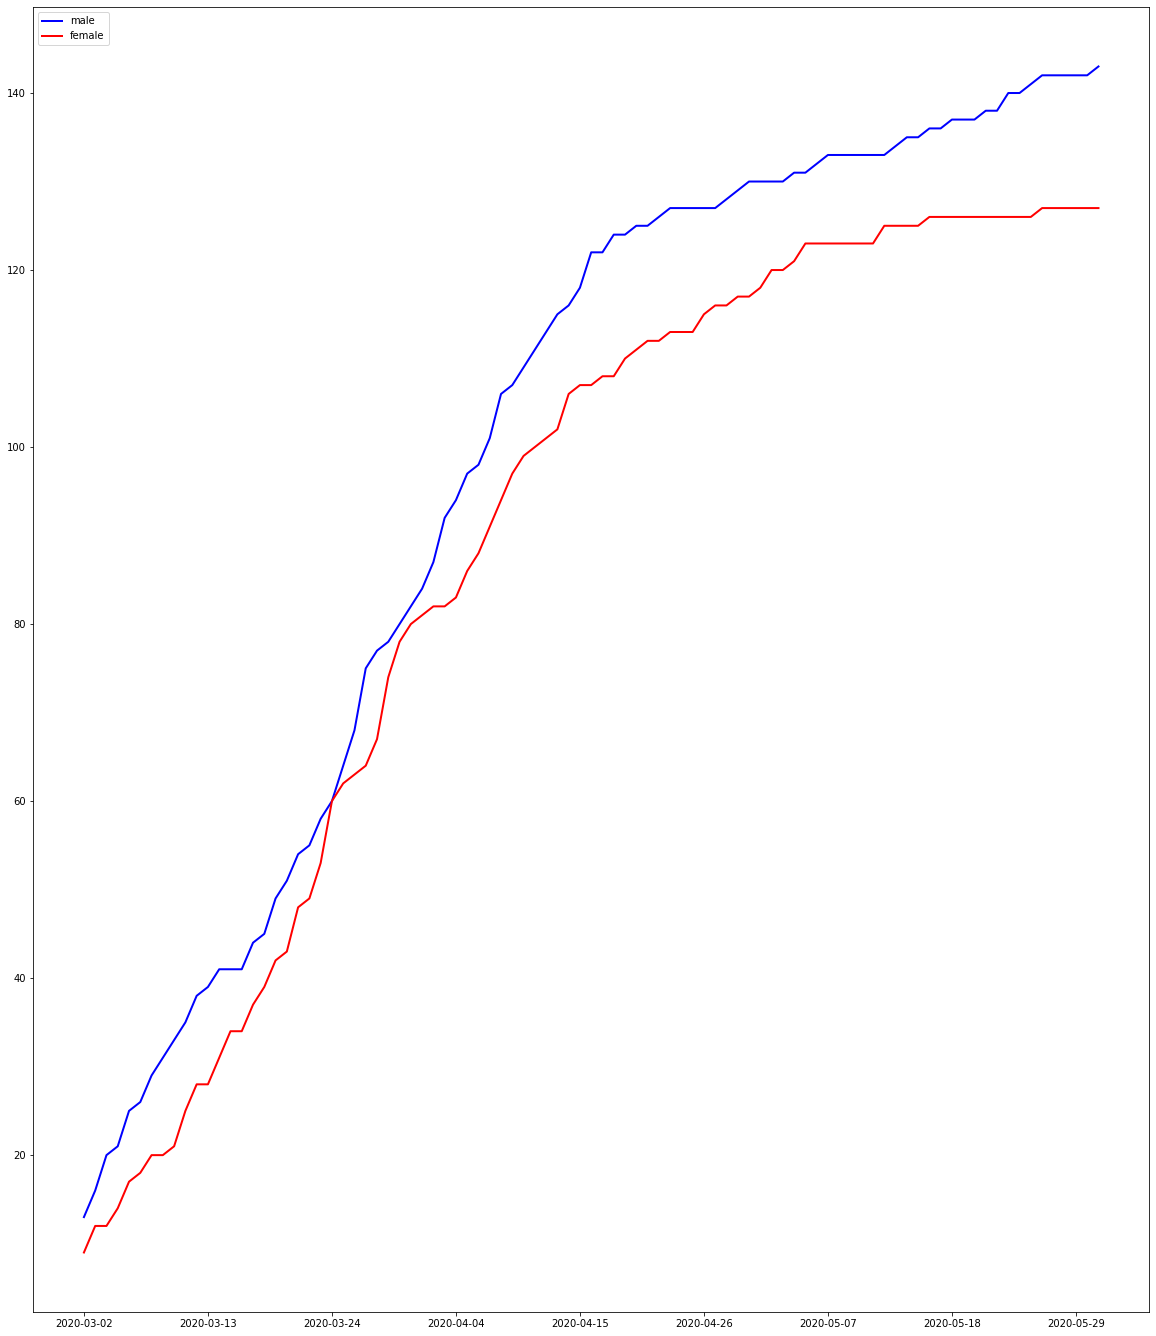

In [17]:
fig, ax = plt.subplots(figsize=(20,24))

# 連續圖
ax.plot(gender.date.unique(), gender.loc[gender['sex'] == 'male', 'deceased'], color = 'blue', linewidth = 2, label='male')
ax.plot(gender.date.unique(), gender.loc[gender['sex'] == 'female', 'deceased'], color = 'red', linewidth = 2, label='female')
plt.legend(loc='upper left')
ax.set_xticks(ax.get_xticks()[::11])

男女累計死亡數，女性較男性高原因可能與女性確診人數較多有關。

(-1.1089013376154888,
 1.1004239005177763,
 -1.1099764463165973,
 1.1201912611549887)

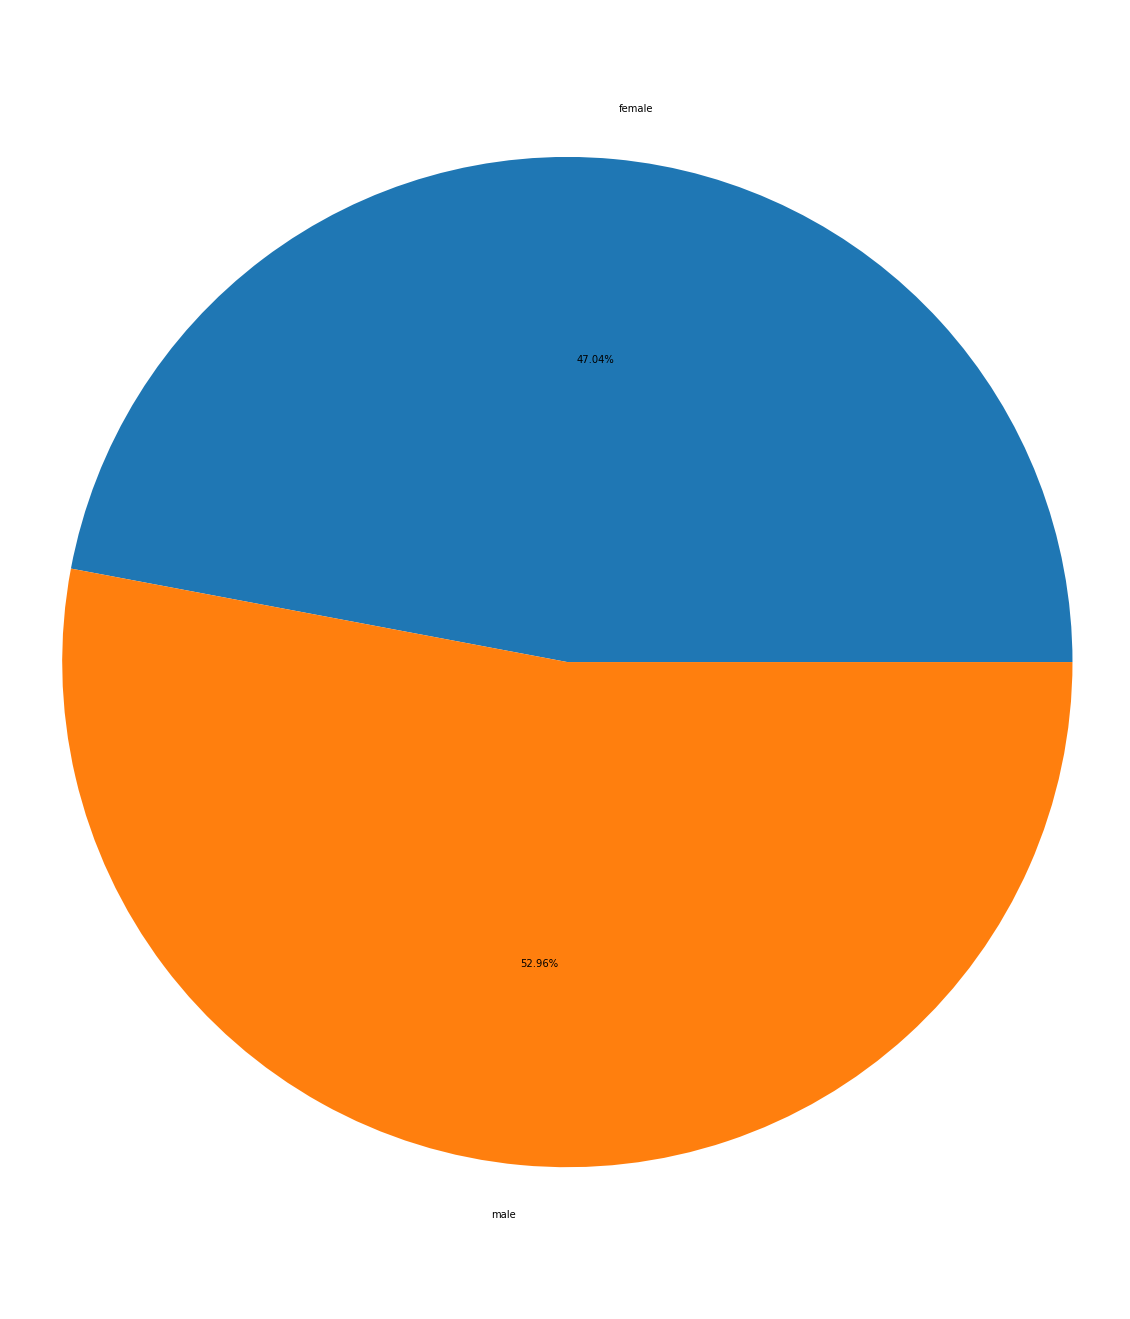

In [18]:
# pie plot
fig, ax = plt.subplots(figsize=(20,24))
order = pd.DataFrame()
order['age'] = gender['sex'].unique()
size = list(gender.loc[gender['date'] == '2020-05-31', 'deceased'])
order['size'] = size
order = order.sort_values(by=['size'])

ax.pie(order['size'], labels=order['age'], autopct='%.2f%%')
plt.axis('equal')

統計至2020-05-31男女死亡人數比，男性死亡數占比較大。

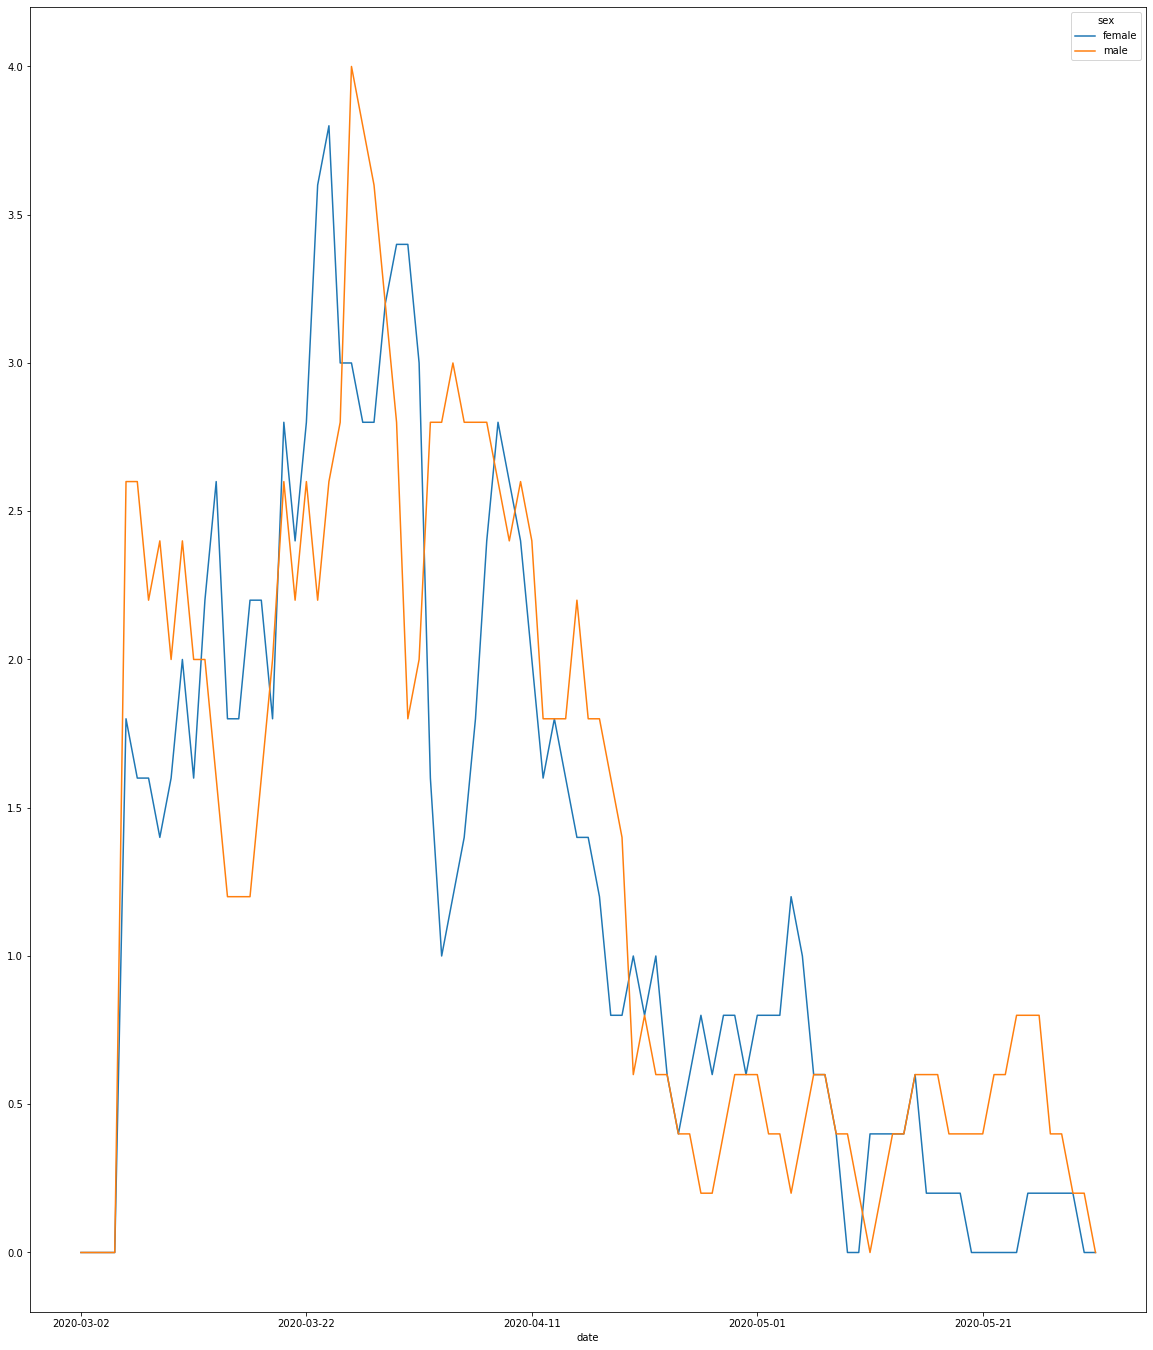

In [95]:
# daily deceased 5 day moving average
for title in gender['sex'].unique():
    day = gender.loc[gender['sex']==title, 'deceased']
    gender.loc[gender['sex']==title, 'daily_deceased'] = day.shift(-1) - day
    gender.loc[gender['sex']==title, 'deceased_5sma']=gender.loc[gender['sex']==title, 'daily_deceased'].rolling(5).mean()


gender.groupby(['date','sex'])['deceased_5sma'].sum() .unstack('sex', fill_value=0).plot(legend=True, figsize=(20,24))

死亡人數取5天moving average。兩者相差不大。

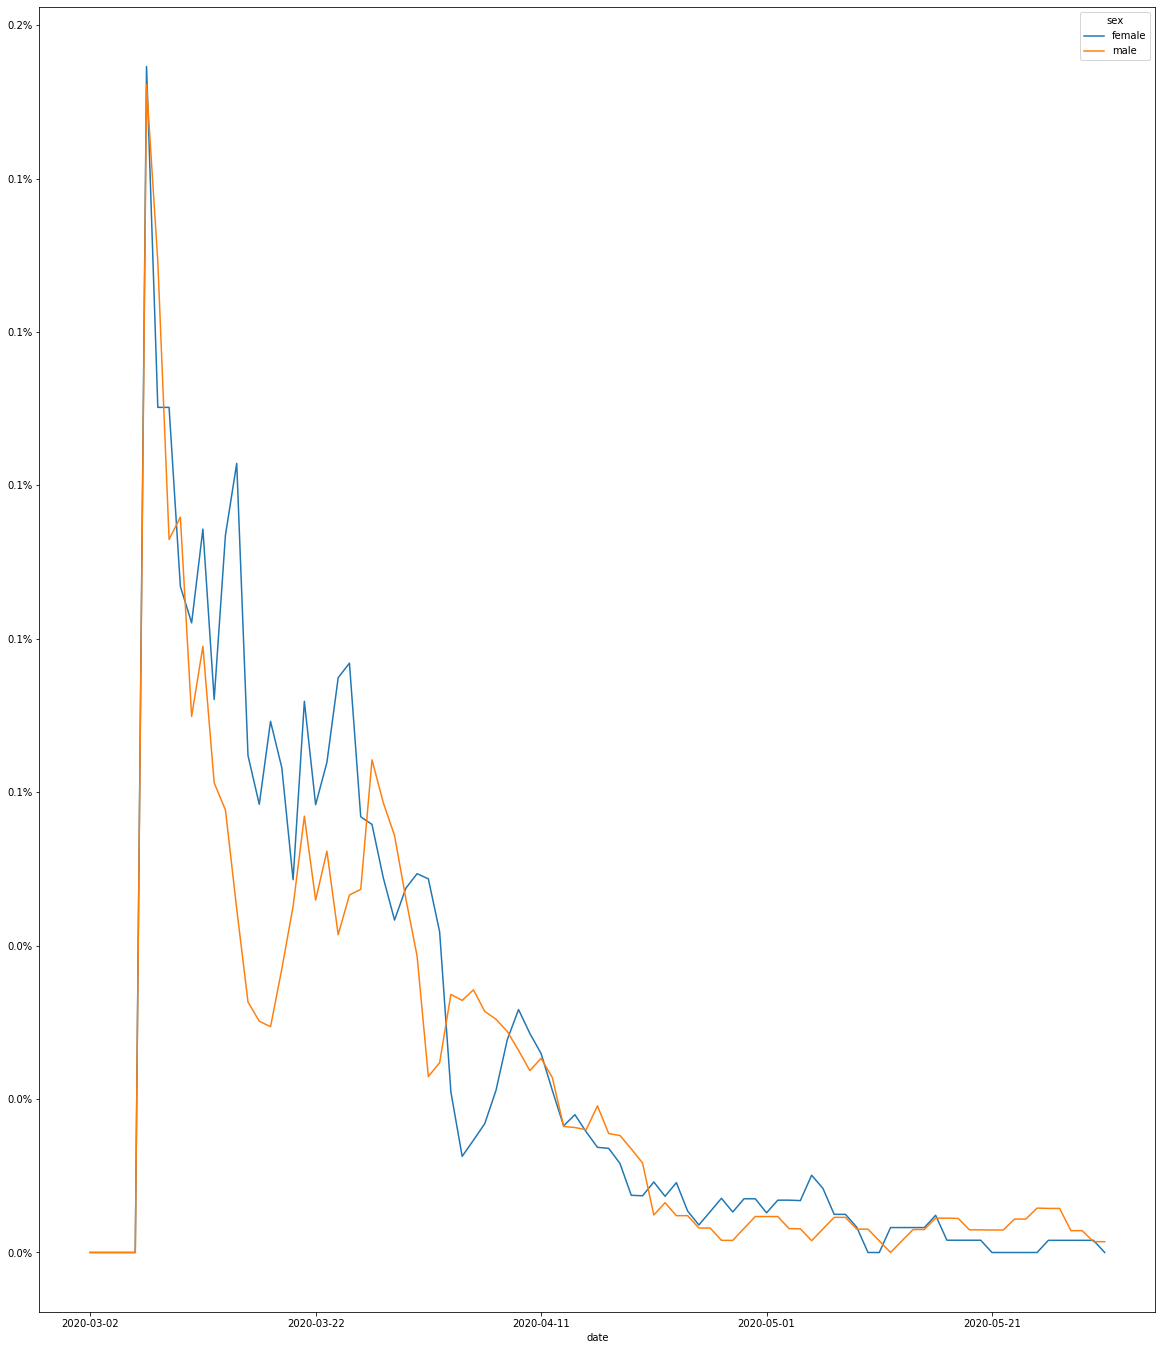

In [97]:
# deceased growth rate (logistic function)
for title in gender['sex'].unique():
    gender.loc[gender['sex']==title, 'deceased_GrowthRate']=gender.loc[gender['sex']==title, 'deceased'].pct_change()
    gender.loc[gender['sex']==title, 'deceased_GrowthRate_sma']=gender.loc[gender['sex']==title, 'deceased_GrowthRate'].rolling(5).mean()

#     age.loc['deceased_GrowthRate_sma'] = age['deceased_GrowthRate'].rolling(5).mean()


gender.groupby(['date','sex'])['deceased_GrowthRate_sma'].sum() .unstack('sex', fill_value=0).plot(legend=True, figsize=(20,24))
plt.gca().set_yticklabels(['{:.1f}%'.format(x) for x in plt.gca().get_yticks()]) 

ax.set_xticks(ax.get_xticks()[::11])

deceased_GrowthRate，男女同時爆發增長。

## Mortality Rate

      sex  mortality_rate
0    male        2.982273
1  female        1.903192


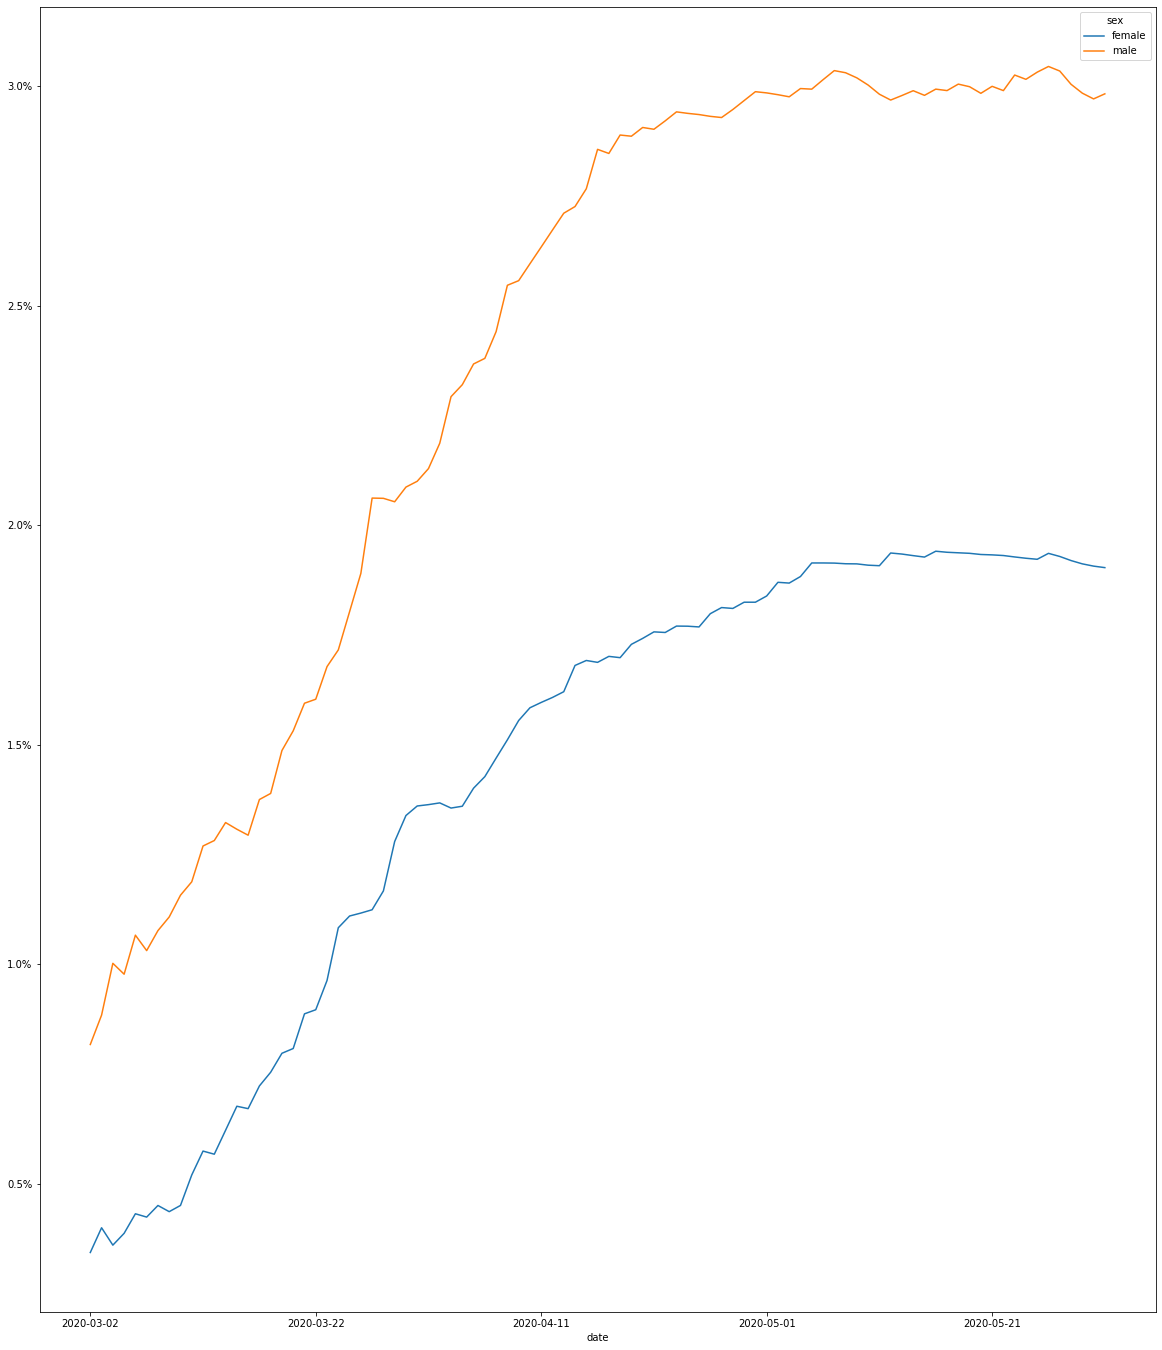

In [62]:
gender['mortality_rate'] = gender['deceased']/gender['confirmed'] * 100
gender.groupby(['date','sex'])['mortality_rate'].sum() .unstack('sex', fill_value=0).plot(legend=True, figsize=(20,24))
plt.gca().set_yticklabels(['{:.1f}%'.format(x) for x in plt.gca().get_yticks()]) 

order = pd.DataFrame()
order['sex'] = gender['sex'].unique()
size = list(gender.loc[gender['date'] == '2020-05-31', 'mortality_rate'])
order['mortality_rate'] = size
order = order.sort_values(by=['mortality_rate'],ascending=False)
print(order)

表為約2個月間的每100人死亡數，男性死亡率明顯高於女性，只從時間序列上無法觀察原因，可能推測是男性染病群整體年齡較大。
圖為每日(累計死亡數/累計確診數)比率，即每日男女每百人死亡數。

# Province

In [20]:
print(province.head())
print(province.tail())

         date  time province  confirmed  released  deceased
0  2020-01-20    16    Seoul          0         0         0
1  2020-01-20    16    Busan          0         0         0
2  2020-01-20    16    Daegu          0         0         0
3  2020-01-20    16  Incheon          1         0         0
4  2020-01-20    16  Gwangju          0         0         0
            date  time          province  confirmed  released  deceased
2256  2020-05-31     0      Jeollabuk-do         21        19         0
2257  2020-05-31     0      Jeollanam-do         19        17         0
2258  2020-05-31     0  Gyeongsangbuk-do       1379      1295        54
2259  2020-05-31     0  Gyeongsangnam-do        123       121         0
2260  2020-05-31     0           Jeju-do         15        13         0


In [21]:
# fig, ax = plt.subplots(figsize=(28,28))
# province_bar = ax.bar(province['province'], province['confirmed'])
# plt.xticks(rotation=45)

(-1.1142423914310642,
 1.100678238943639,
 -1.1113895674461785,
 1.1047929429169936)

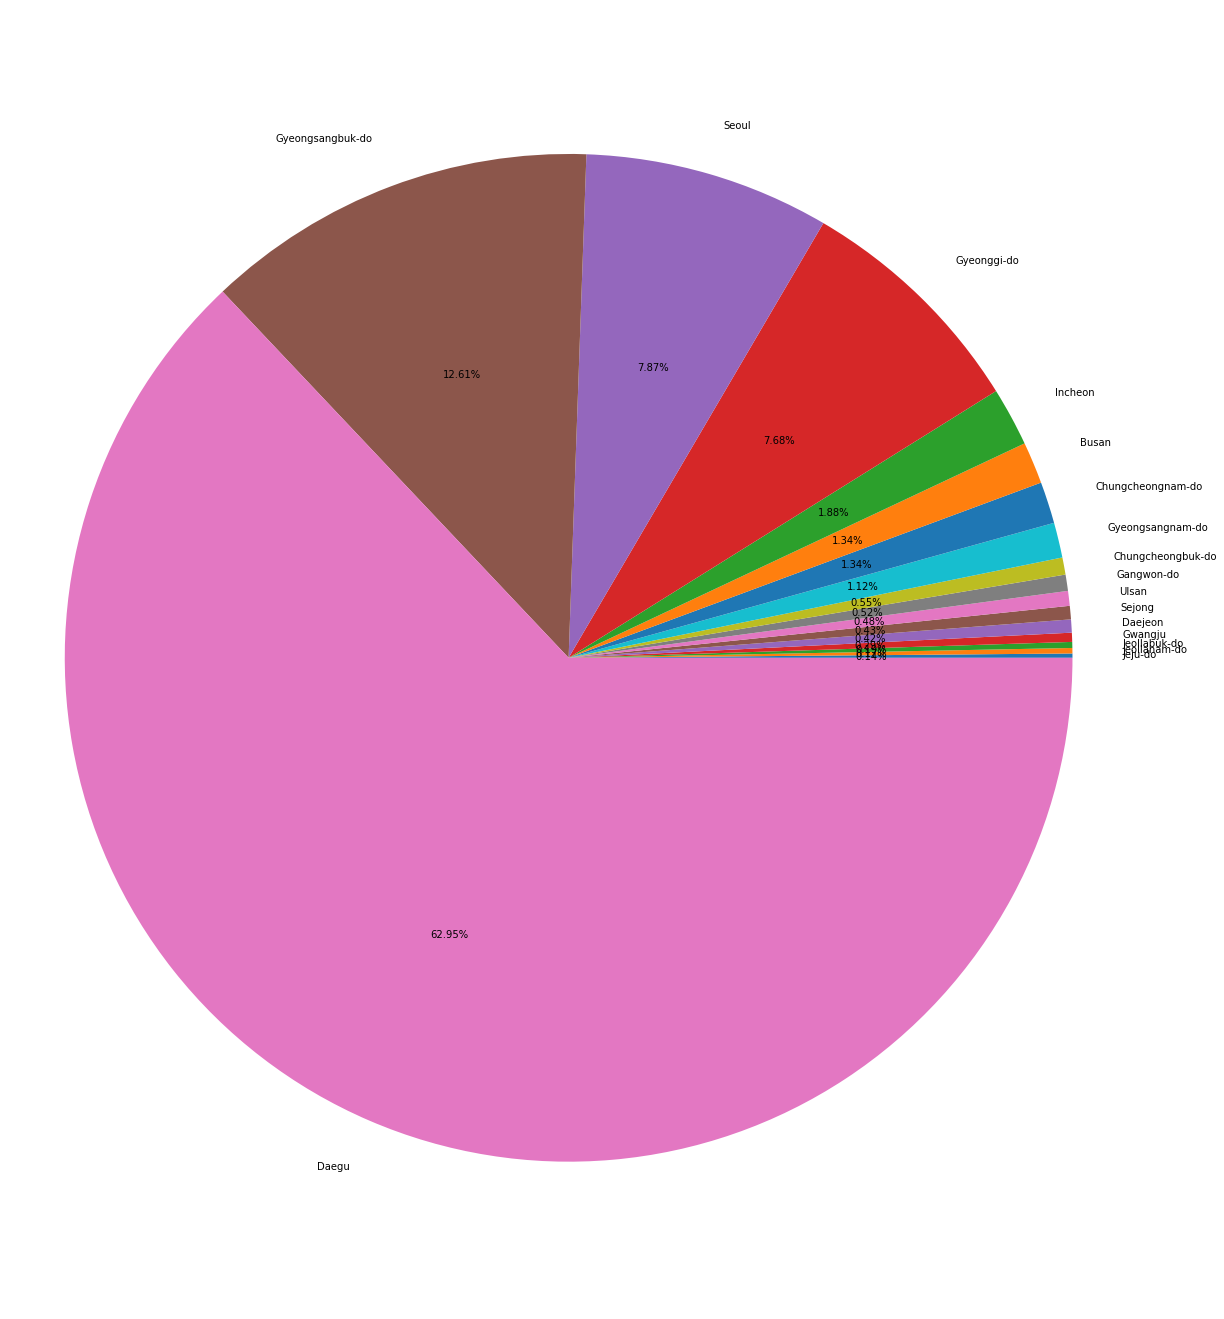

In [22]:
# last day confirmed percentage
order = pd.DataFrame()
order['province'] = province['province'].unique()
size = list(province.loc[province['date'] == '2020-05-31', 'confirmed'])
order['size'] = size
order = order.sort_values(by=['size'])

fig, ax = plt.subplots(figsize=(20,24))
ax.pie(order['size'], labels=order['province'], autopct='%.2f%%')
plt.axis('equal')

統計至2020-05-31日各地區確診人數占比。

In [23]:
# fig, ax = plt.subplots(figsize=(20,24))
# ax.plot(province.date.unique(), province.loc[province['province'] == 'Daegu', 'confirmed'], color = 'blue', linewidth = 2)
# ax.set_xticks(ax.get_xticks()[::11])

In [24]:
# # Total
# total_list = province.groupby('date').sum().confirmed
# fig, ax = plt.subplots(figsize=(13, 7))
# plt.title('Cumulative Confirmed Cases (total)', fontsize=17)
# ax.set_xlabel('Date', size=13)
# ax.set_ylabel('Number of cases', size=13)
# plt.plot(province.date.unique()
#          , province.groupby('date').sum().confirmed)
# ax.set_xticks(ax.get_xticks()[::11])

In [25]:
# # Daegu
# loc = province.loc[province['province'] == 'Daegu']
# fig, ax = plt.subplots(figsize=(13, 7))
# plt.title('Cumulative Confirmed Cases (Daegu)', fontsize=17)
# ax.set_xlabel('Date', size=13)
# ax.set_ylabel('Number of cases', size=13)
# plt.plot(province.date.unique(), loc['confirmed'])
# ax.set_xticks(ax.get_xticks()[::11])

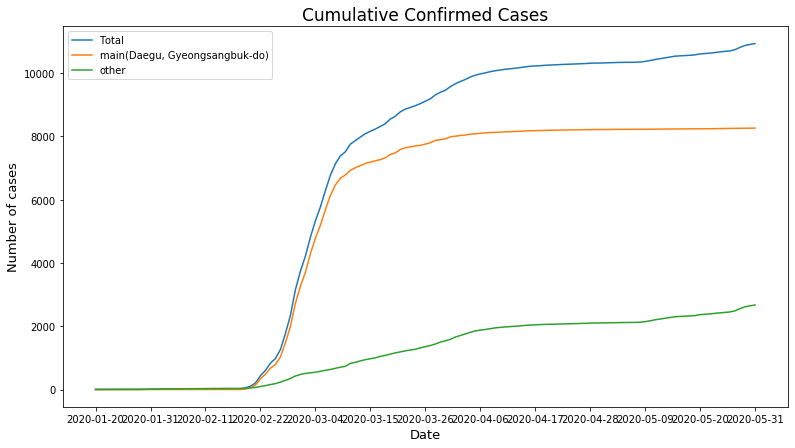

In [26]:
# Cumulative Confirmed Cases
# Total
total_list = province.groupby('date').sum().confirmed
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Confirmed Cases', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(province.date.unique(), province.groupby('date').sum().confirmed , label='Total')
# ax.set_xticks(ax.get_xticks()[::11])

# main
loc = province[(province.province=='Daegu') | (province.province=='Gyeongsangbuk-do')].groupby('date').sum().confirmed
# fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Confirmed Cases', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(province.date.unique(), loc, label='main(Daegu, Gyeongsangbuk-do)')
# ax.set_xticks(ax.get_xticks()[::11])

# other
loc = province[(province.province!='Daegu') & (province.province!='Gyeongsangbuk-do')].groupby('date').sum().confirmed
# fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Confirmed Cases', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(province.date.unique(), loc, label='other')
ax.set_xticks(ax.get_xticks()[::11])

plt.legend(loc='upper left')

2月底特定地區大量指數型爆發，而其他地區線性增長，造成總確診數跟著指數型爆發。最後總確診數上揚與其他地區確診數上揚較為相關。

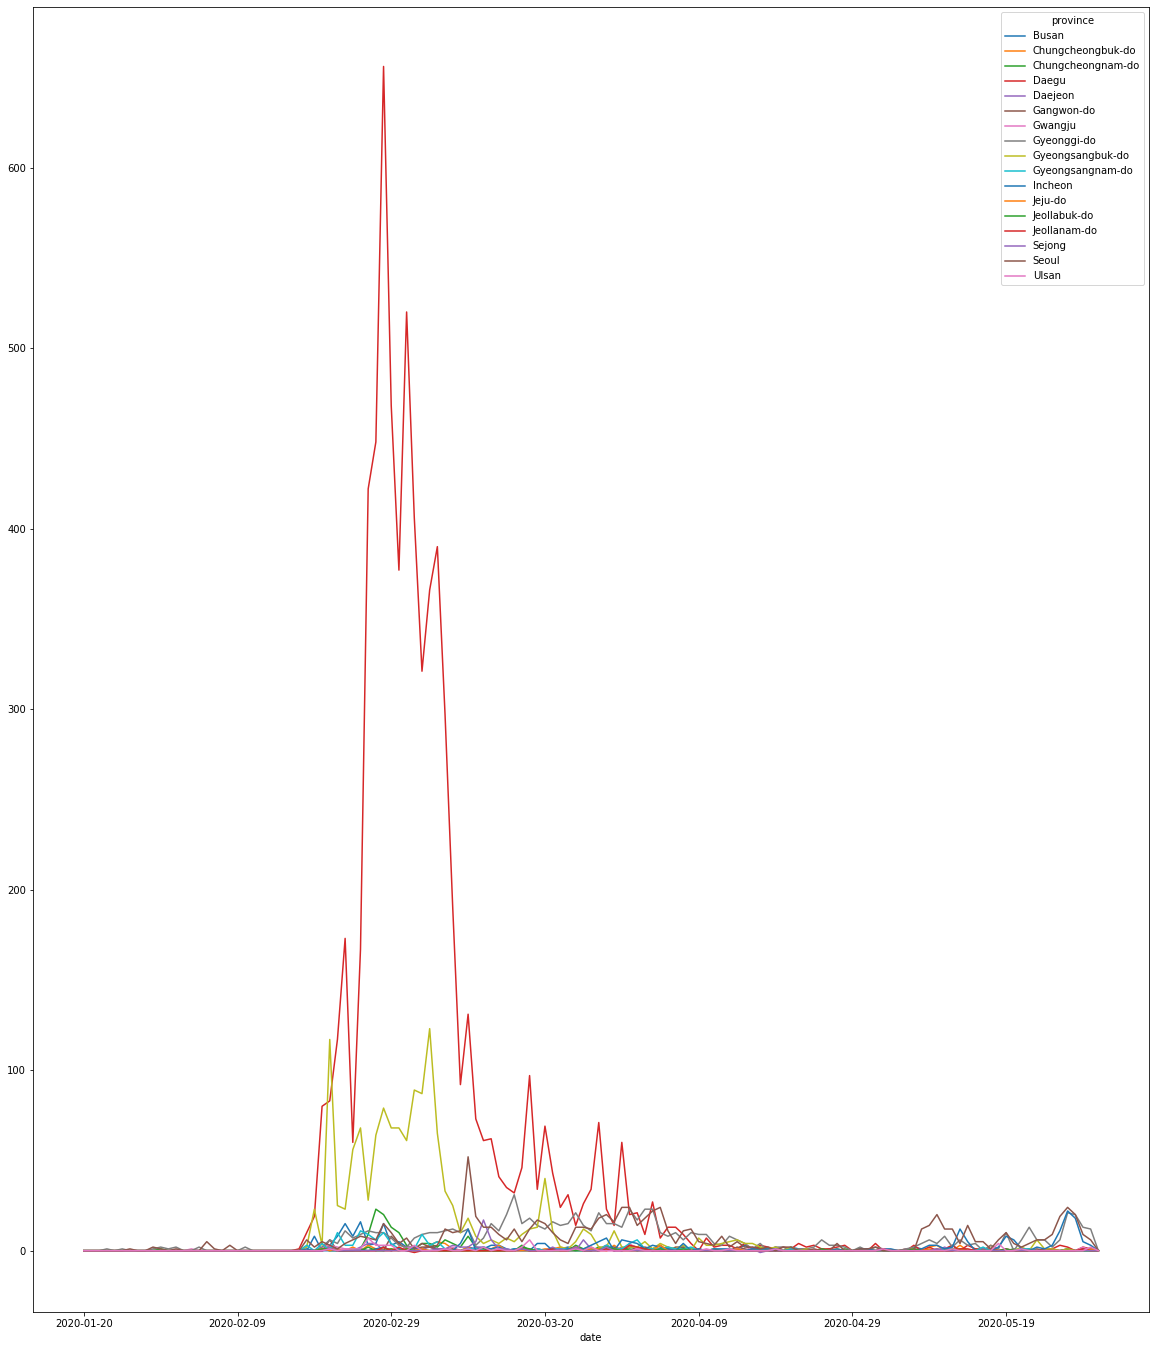

In [27]:
# daily confirmed
for title in province['province'].unique():
    day = province.loc[province['province']==title, 'confirmed']
    province.loc[province['province']==title, 'daily_confirmed'] = day.shift(-1) - day

province.groupby(['date','province'])['daily_confirmed'].sum() .unstack('province', fill_value=0).plot(legend=True, figsize=(20,24))

每日確診數，高峰期後地區增長率相差不大。最後首爾地區梅日確診數突然爆發與上圖累計確診數相關。

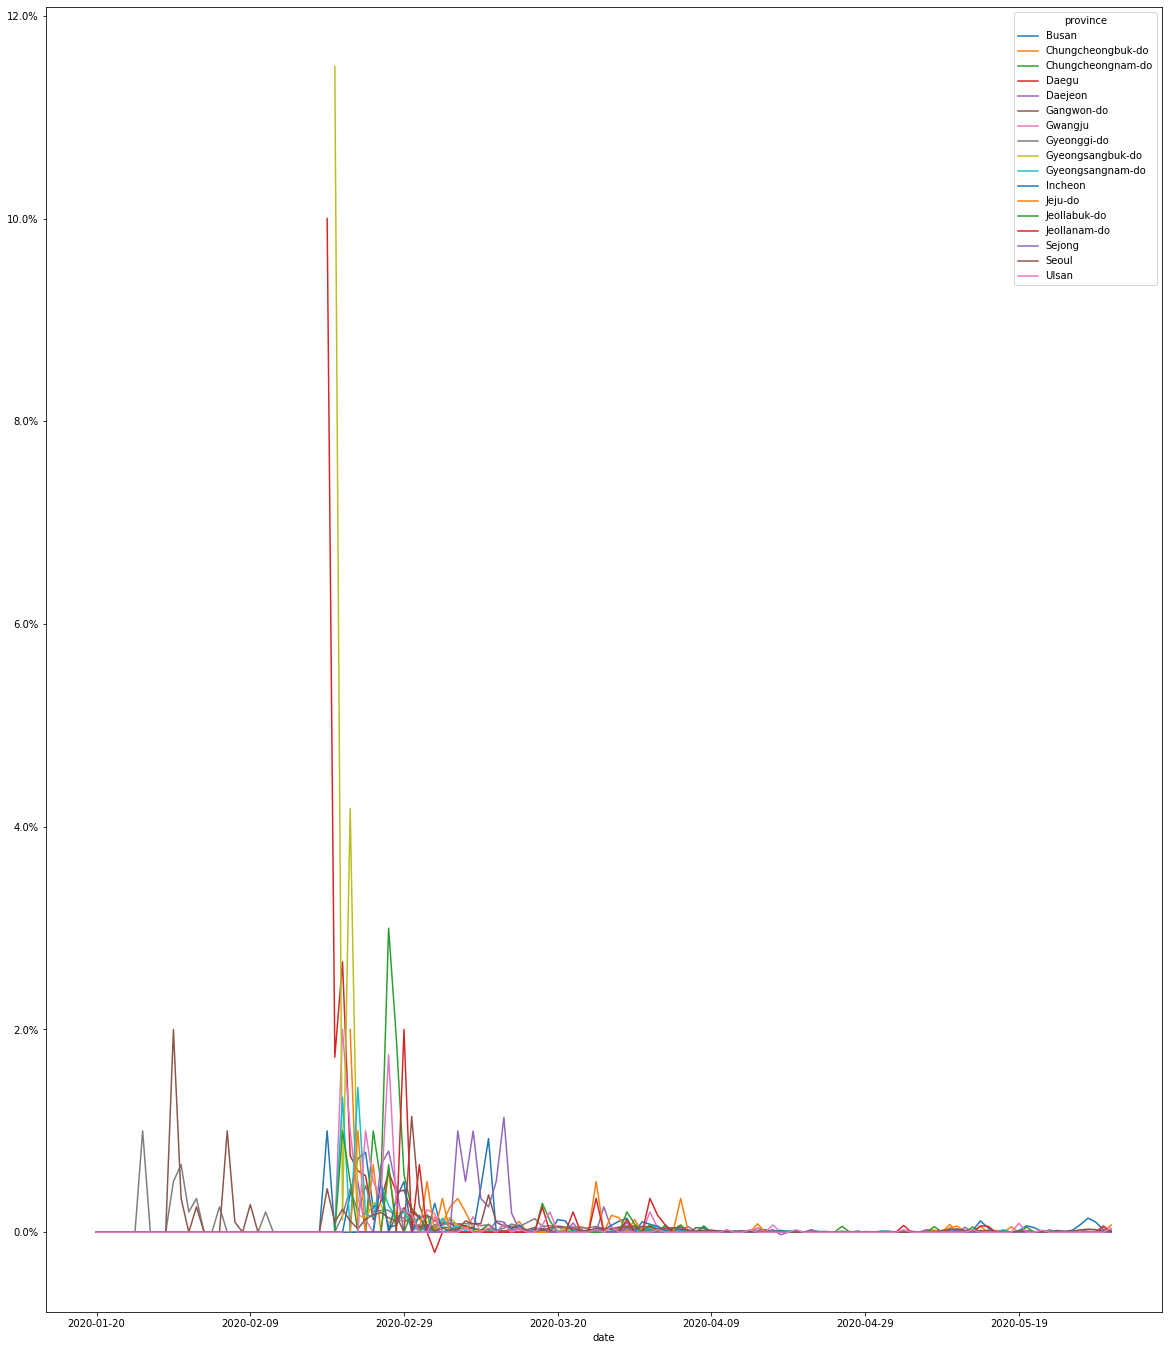

In [101]:
# confirmed growth rate (logistic function)
for title in province['province'].unique():
    province.loc[province['province']==title, 'confirmed_GrowthRate']=province.loc[province['province']==title, 'confirmed'].pct_change()
#     province.loc[province['sex']==title, 'confirmed_GrowthRate_sma']=province.loc[province['province']==title, 'confirmed_GrowthRate'].rolling(5).mean()


province.groupby(['date','province'])['confirmed_GrowthRate'].sum() .unstack('province', fill_value=0).plot(legend=True, figsize=(20,24))
plt.gca().set_yticklabels(['{:.1f}%'.format(x) for x in plt.gca().get_yticks()]) 

ax.set_xticks(ax.get_xticks()[::11])

## Deceased

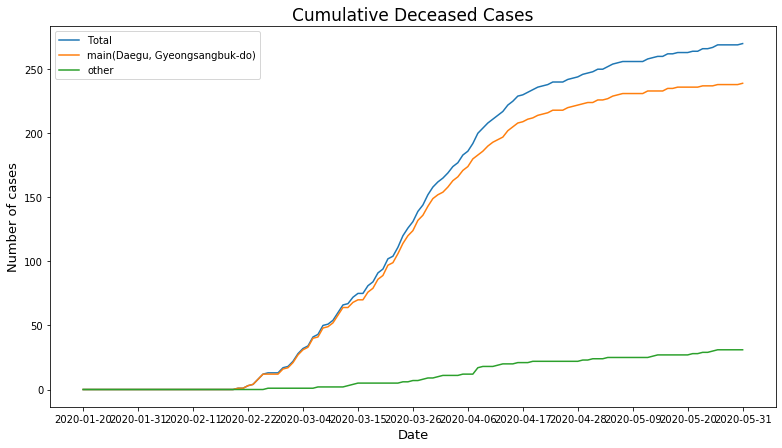

In [28]:
# Cumulative deceased Cases
# Total
total_list = province.groupby('date').sum().deceased
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Deceased Cases', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(province.date.unique(), province.groupby('date').sum().deceased , label='Total')
# ax.set_xticks(ax.get_xticks()[::11])

# main
loc = province[(province.province=='Daegu') | (province.province=='Gyeongsangbuk-do')].groupby('date').sum().deceased
# fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Deceased Cases', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(province.date.unique(), loc, label='main(Daegu, Gyeongsangbuk-do)')
# ax.set_xticks(ax.get_xticks()[::11])

# other
loc = province[(province.province!='Daegu') & (province.province!='Gyeongsangbuk-do')].groupby('date').sum().deceased
# fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Deceased Cases', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(province.date.unique(), loc, label='other')
ax.set_xticks(ax.get_xticks()[::11])

plt.legend(loc='upper left')

總死亡數幾乎隨著主要爆發地區趨勢增長，而最後的上揚同樣是其他地區影響。

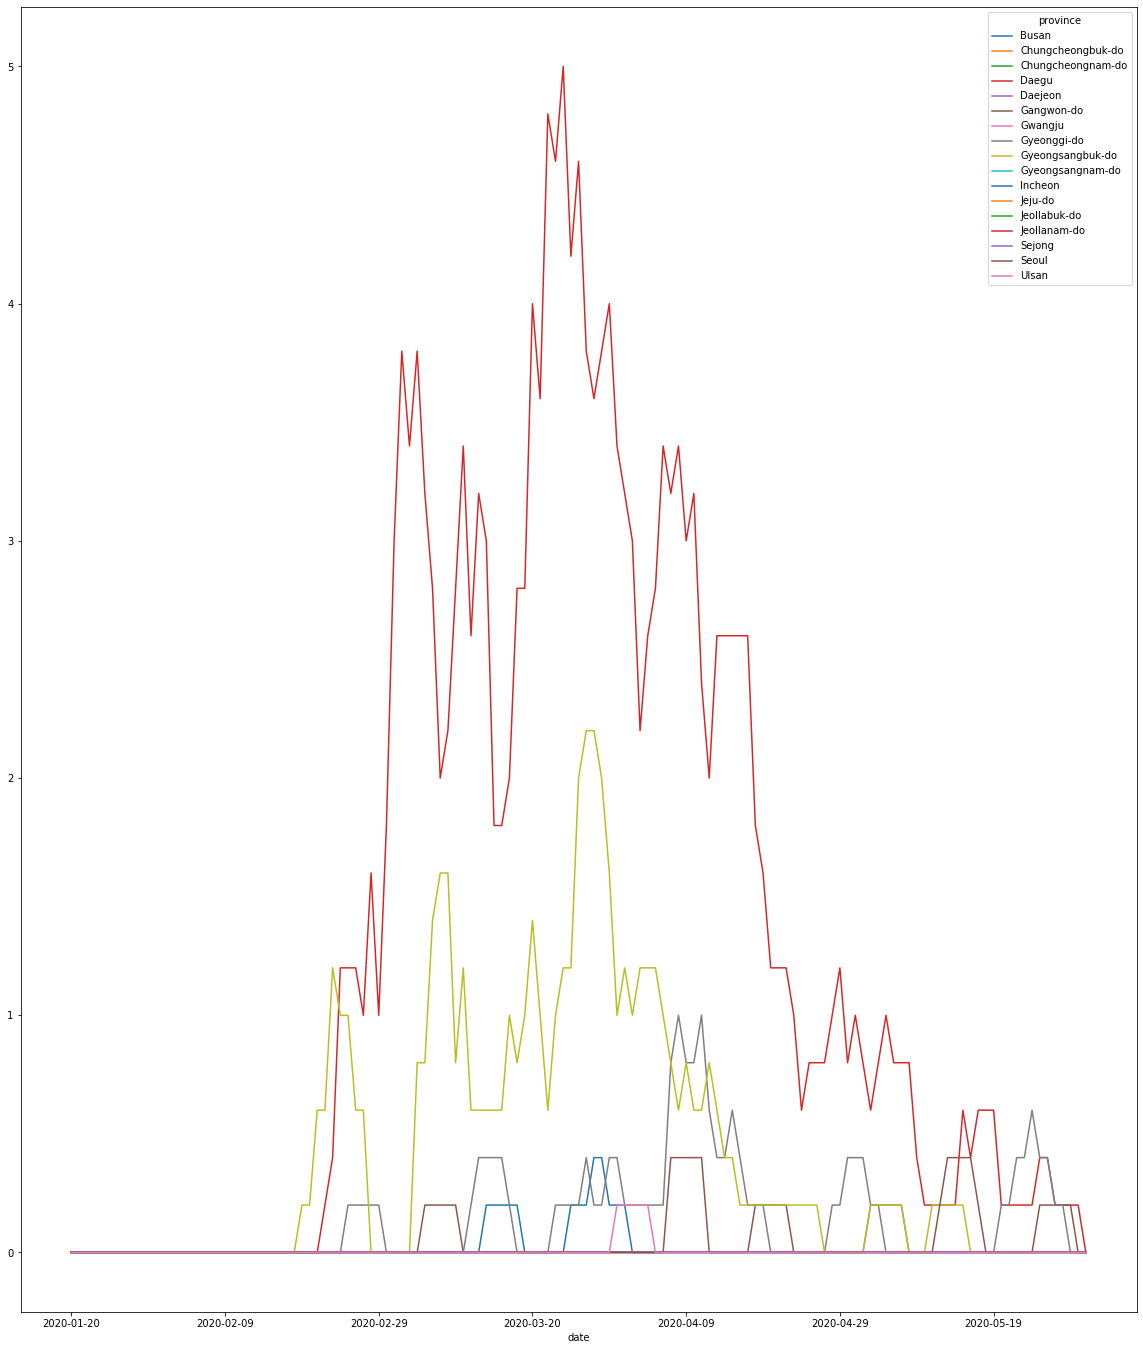

In [96]:
# daily deceased
for title in province['province'].unique():
    day = province.loc[province['province']==title, 'deceased']
    province.loc[province['province']==title, 'daily_deceased'] = day.shift(-1) - day
    province.loc[province['province']==title, 'deceased_5sma']=province.loc[province['province']==title, 'daily_deceased'].rolling(5).mean()


province.groupby(['date','province'])['deceased_5sma'].sum() .unstack('province', fill_value=0).plot(legend=True, figsize=(20,24))

最後死亡數上揚和病情爆發的首爾地區有關聯。

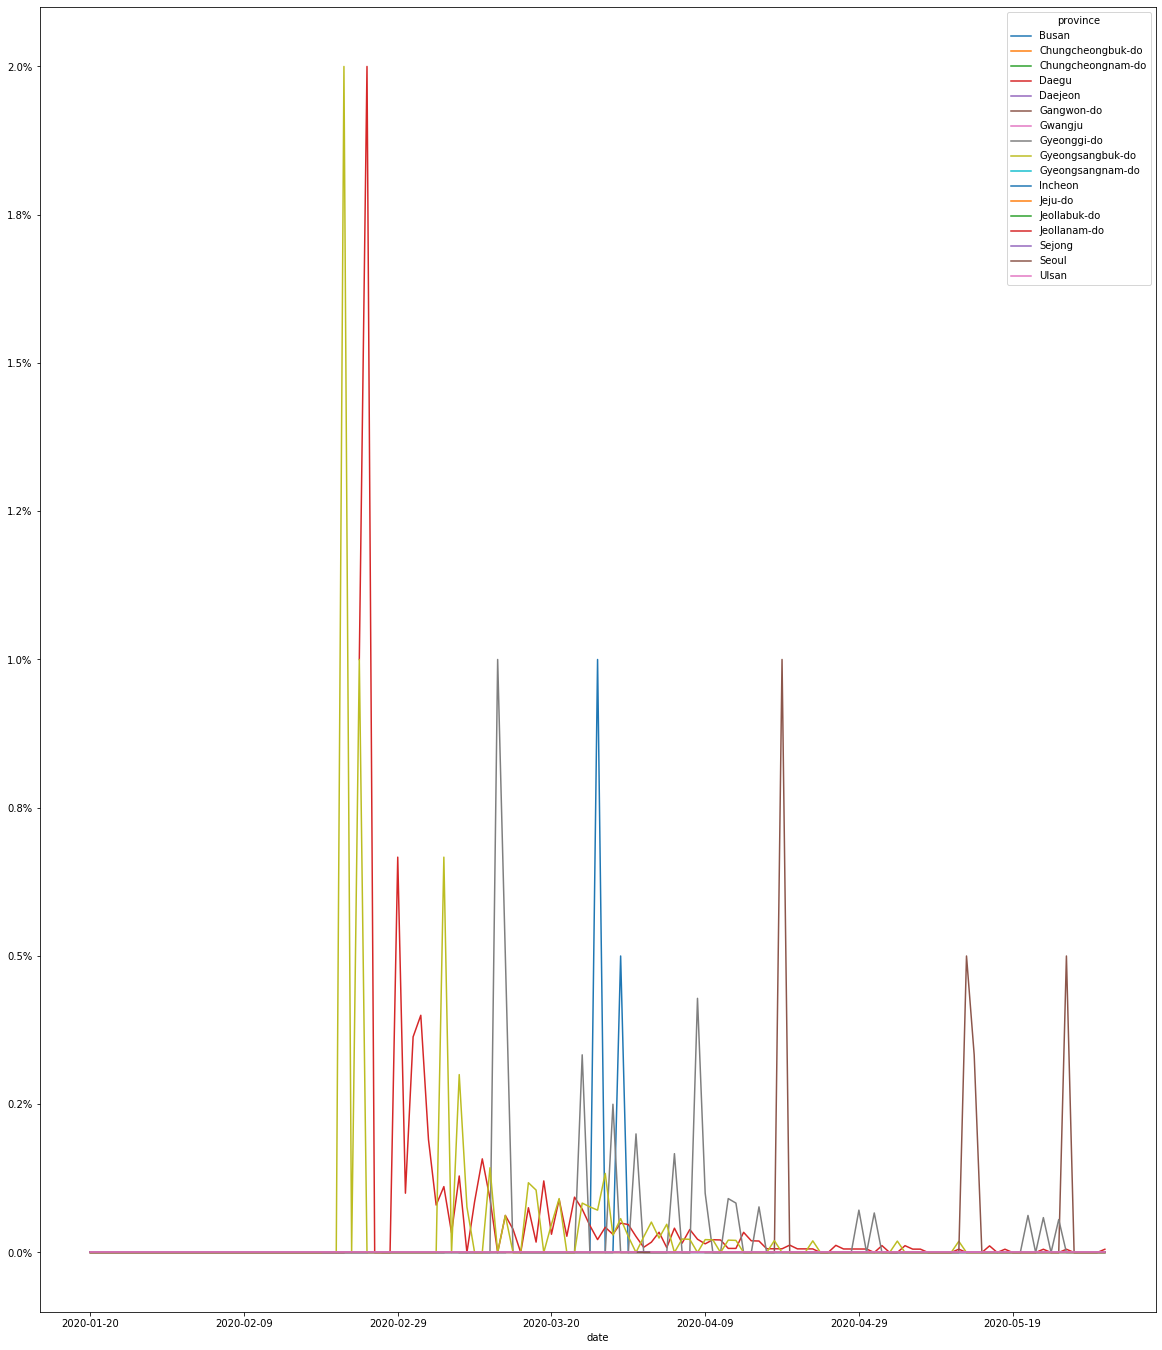

In [102]:
# deceased growth rate (logistic function)
for title in province['province'].unique():
    province.loc[province['province']==title, 'deceased_GrowthRate']=province.loc[province['province']==title, 'deceased'].pct_change()
#     province.loc[province['sex']==title, 'confirmed_GrowthRate_sma']=province.loc[province['province']==title, 'confirmed_GrowthRate'].rolling(5).mean()


province.groupby(['date','province'])['deceased_GrowthRate'].sum() .unstack('province', fill_value=0).plot(legend=True, figsize=(20,24))
plt.gca().set_yticklabels(['{:.1f}%'.format(x) for x in plt.gca().get_yticks()]) 

ax.set_xticks(ax.get_xticks()[::11])

(-1.1125186163575622,
 1.1005961367572576,
 -1.1083636945238213,
 1.1234062736169736)

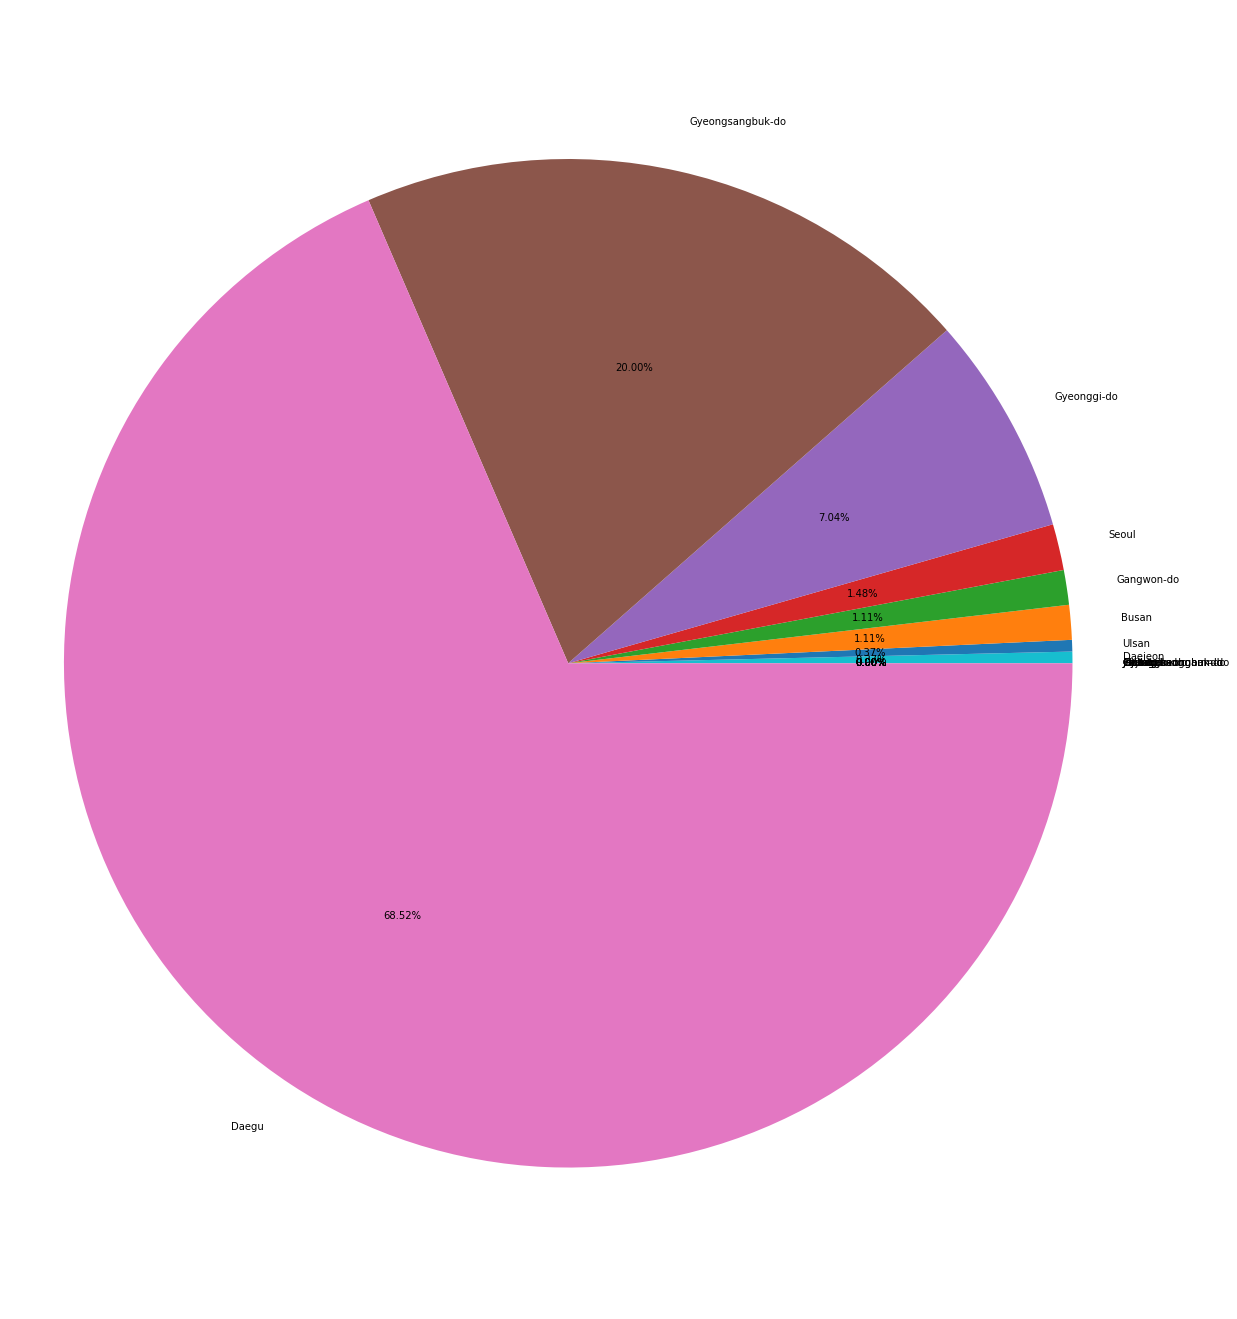

In [30]:
order = pd.DataFrame()
order['province'] = province['province'].unique()
size = list(province.loc[province['date'] == '2020-05-31', 'deceased'])
order['size'] = size
order = order.sort_values(by=['size'])

fig, ax = plt.subplots(figsize=(20,24))
ax.pie(order['size'], labels=order['province'], autopct='%.2f%%')
plt.axis('equal')

統計至2020-05-31日各地區死亡人數占比。

## Released

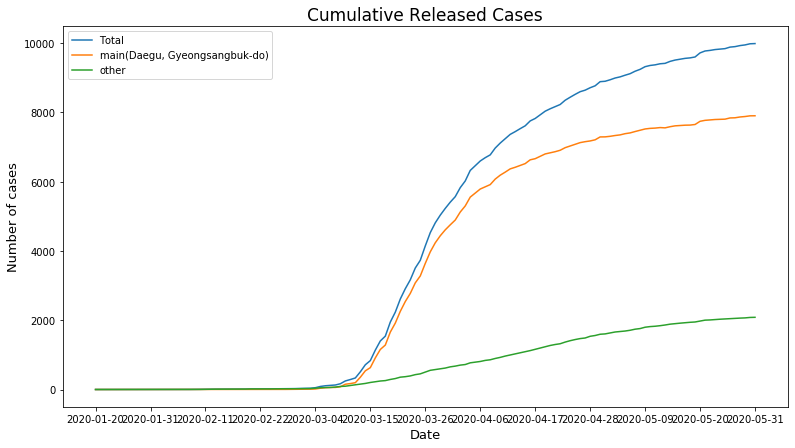

In [31]:
# Cumulative released Cases
# Total
total_list = province.groupby('date').sum().released
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Released Cases', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(province.date.unique(), province.groupby('date').sum().released , label='Total')
# ax.set_xticks(ax.get_xticks()[::11])

# main
loc = province[(province.province=='Daegu') | (province.province=='Gyeongsangbuk-do')].groupby('date').sum().released
# fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Released Cases', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(province.date.unique(), loc, label='main(Daegu, Gyeongsangbuk-do)')
# ax.set_xticks(ax.get_xticks()[::11])

# other
loc = province[(province.province!='Daegu') & (province.province!='Gyeongsangbuk-do')].groupby('date').sum().released
# fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Released Cases', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(province.date.unique(), loc, label='other')
ax.set_xticks(ax.get_xticks()[::11])

plt.legend(loc='upper left')

(-1.1040474961941384,
 1.100192745121594,
 -1.1025561530133643,
 1.1097222506574411)

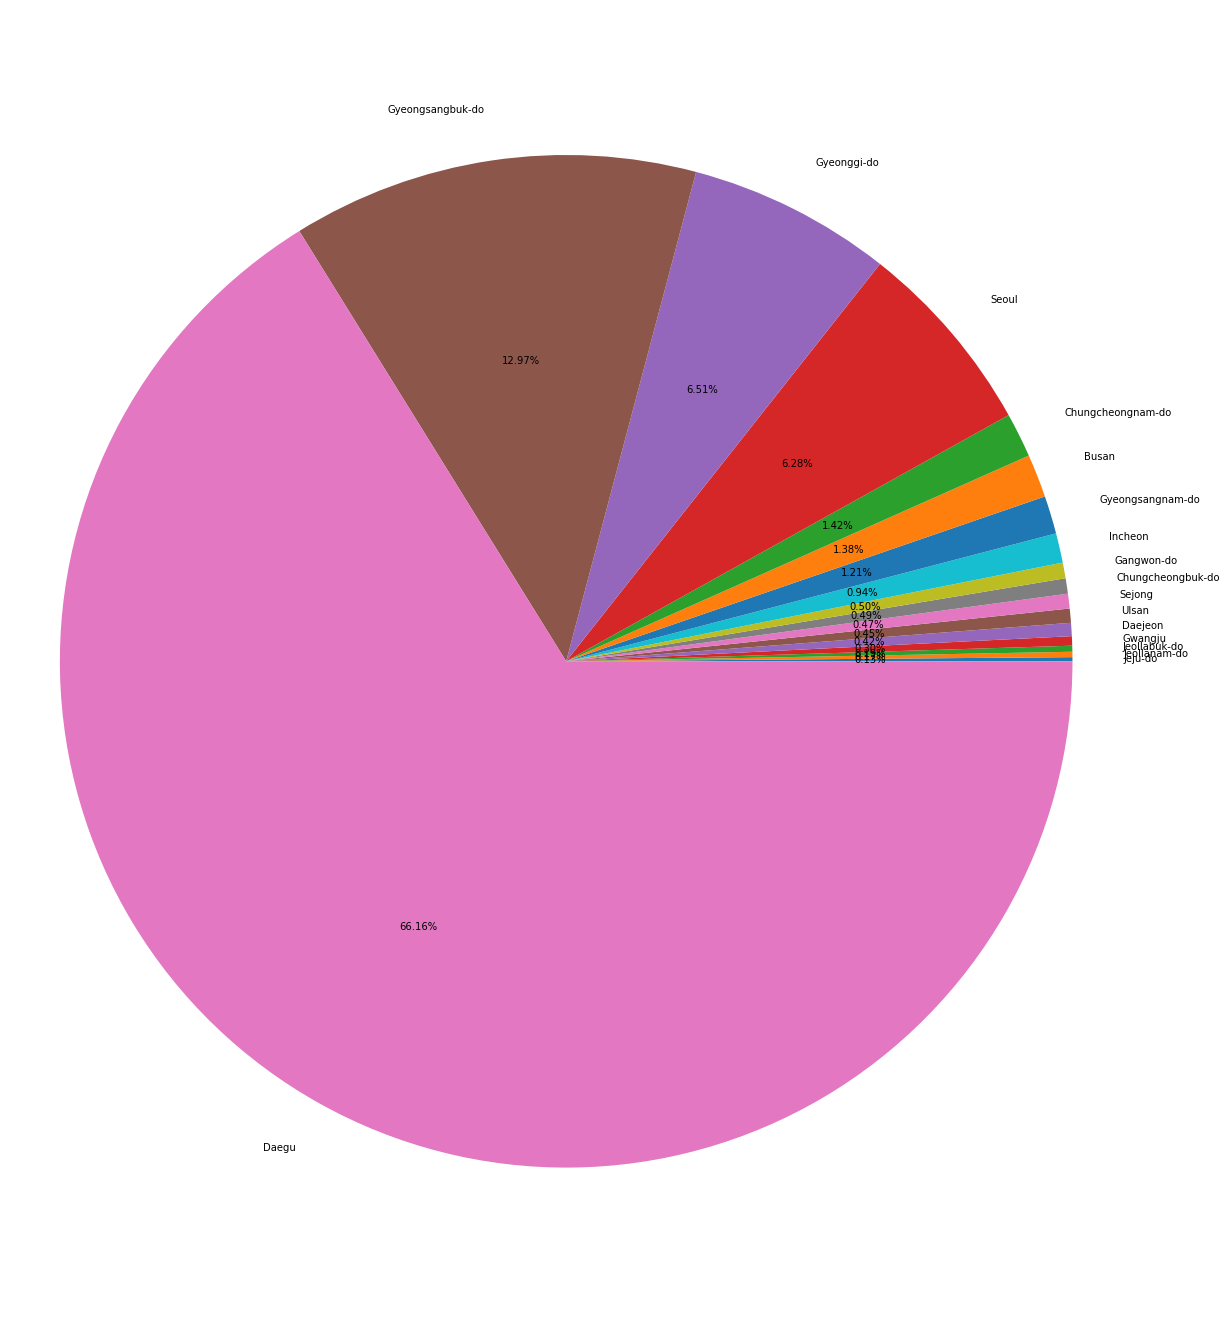

In [32]:
order = pd.DataFrame()
order['province'] = province['province'].unique()
size = list(province.loc[province['date'] == '2020-05-31', 'released'])
order['size'] = size
order = order.sort_values(by=['size'])

fig, ax = plt.subplots(figsize=(20,24))
ax.pie(order['size'], labels=order['province'], autopct='%.2f%%')
plt.axis('equal')

隔離釋放人數也是爆發地區占多數，可能與爆發地區大規模篩檢有關。

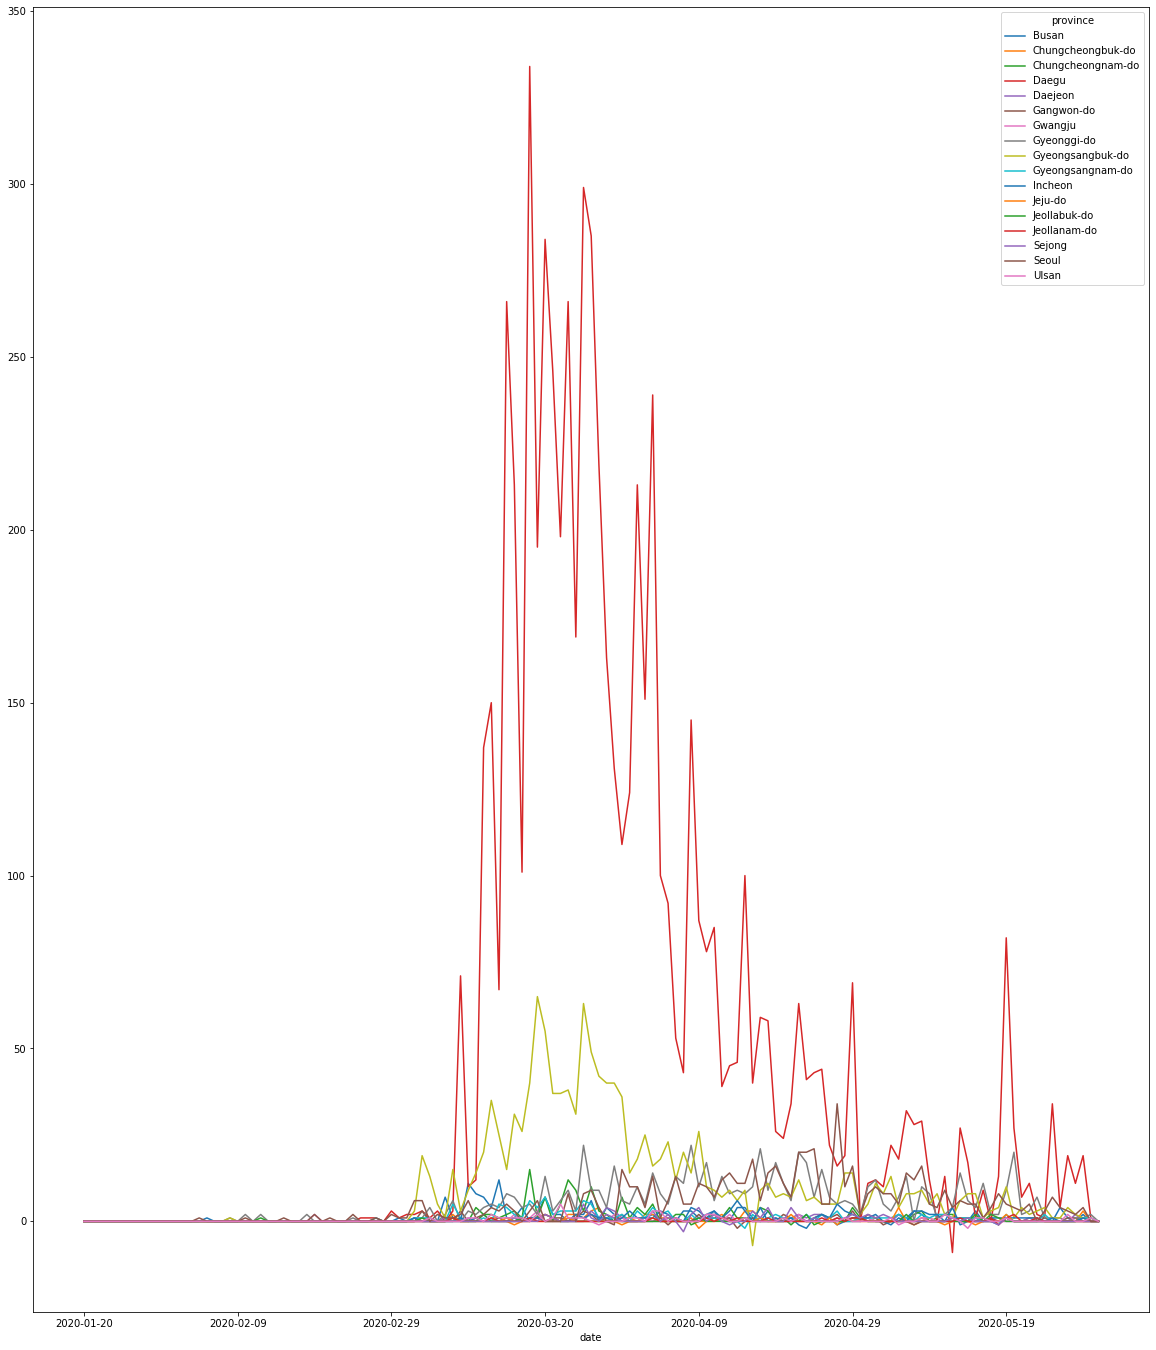

In [33]:
# daily released
for title in province['province'].unique():
    day = province.loc[province['province']==title, 'released']
    province.loc[province['province']==title, 'daily_released'] = day.shift(-1) - day

province.groupby(['date','province'])['daily_released'].sum() .unstack('province', fill_value=0).plot(legend=True, figsize=(20,24))

表為每日從隔離中釋放人數，其中負數代表復陽的情況或是統計錯誤或是該病患死亡，單純從時間上不得而知。

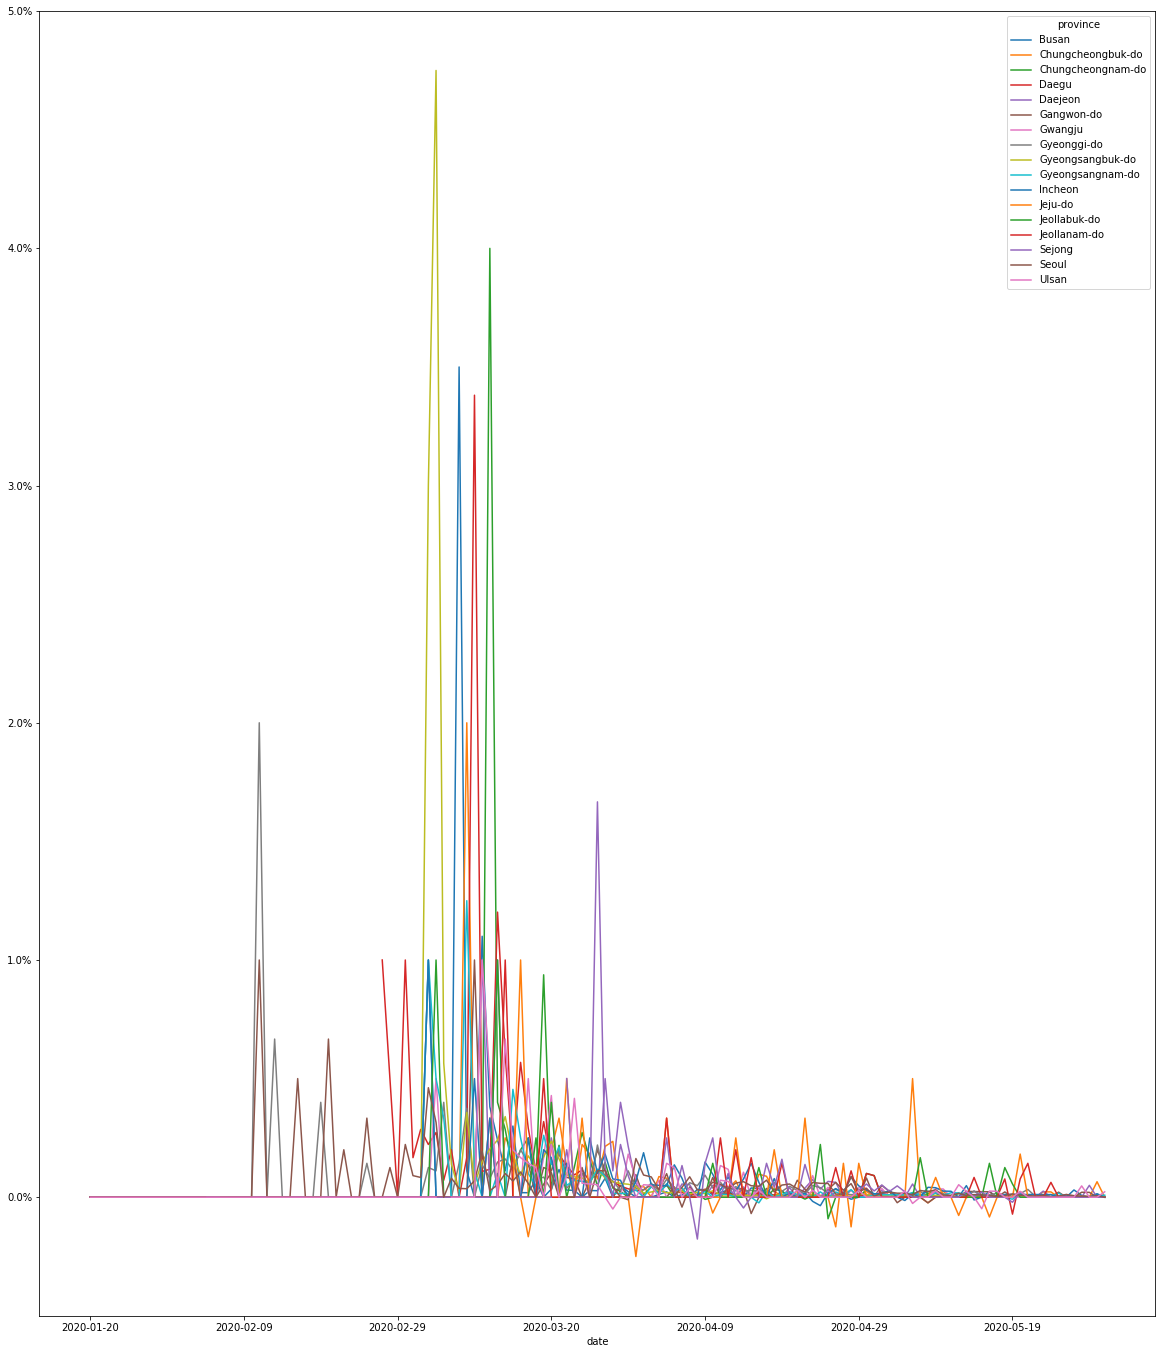

In [103]:
# released growth rate (logistic function)
for title in province['province'].unique():
    province.loc[province['province']==title, 'released_GrowthRate']=province.loc[province['province']==title, 'released'].pct_change()
#     province.loc[province['sex']==title, 'confirmed_GrowthRate_sma']=province.loc[province['province']==title, 'confirmed_GrowthRate'].rolling(5).mean()


province.groupby(['date','province'])['released_GrowthRate'].sum() .unstack('province', fill_value=0).plot(legend=True, figsize=(20,24))
plt.gca().set_yticklabels(['{:.1f}%'.format(x) for x in plt.gca().get_yticks()]) 

ax.set_xticks(ax.get_xticks()[::11])

## Mortality Rate

             province  mortality_rate
9          Gangwon-do        5.263158
14   Gyeongsangbuk-do        3.915881
2               Daegu        2.687781
8         Gyeonggi-do        2.261905
5             Daejeon        2.173913
1               Busan        2.040816
6               Ulsan        1.923077
0               Seoul        0.464576
7              Sejong        0.000000
4             Gwangju        0.000000
10  Chungcheongbuk-do        0.000000
11  Chungcheongnam-do        0.000000
12       Jeollabuk-do        0.000000
13       Jeollanam-do        0.000000
3             Incheon        0.000000
15   Gyeongsangnam-do        0.000000
16            Jeju-do        0.000000


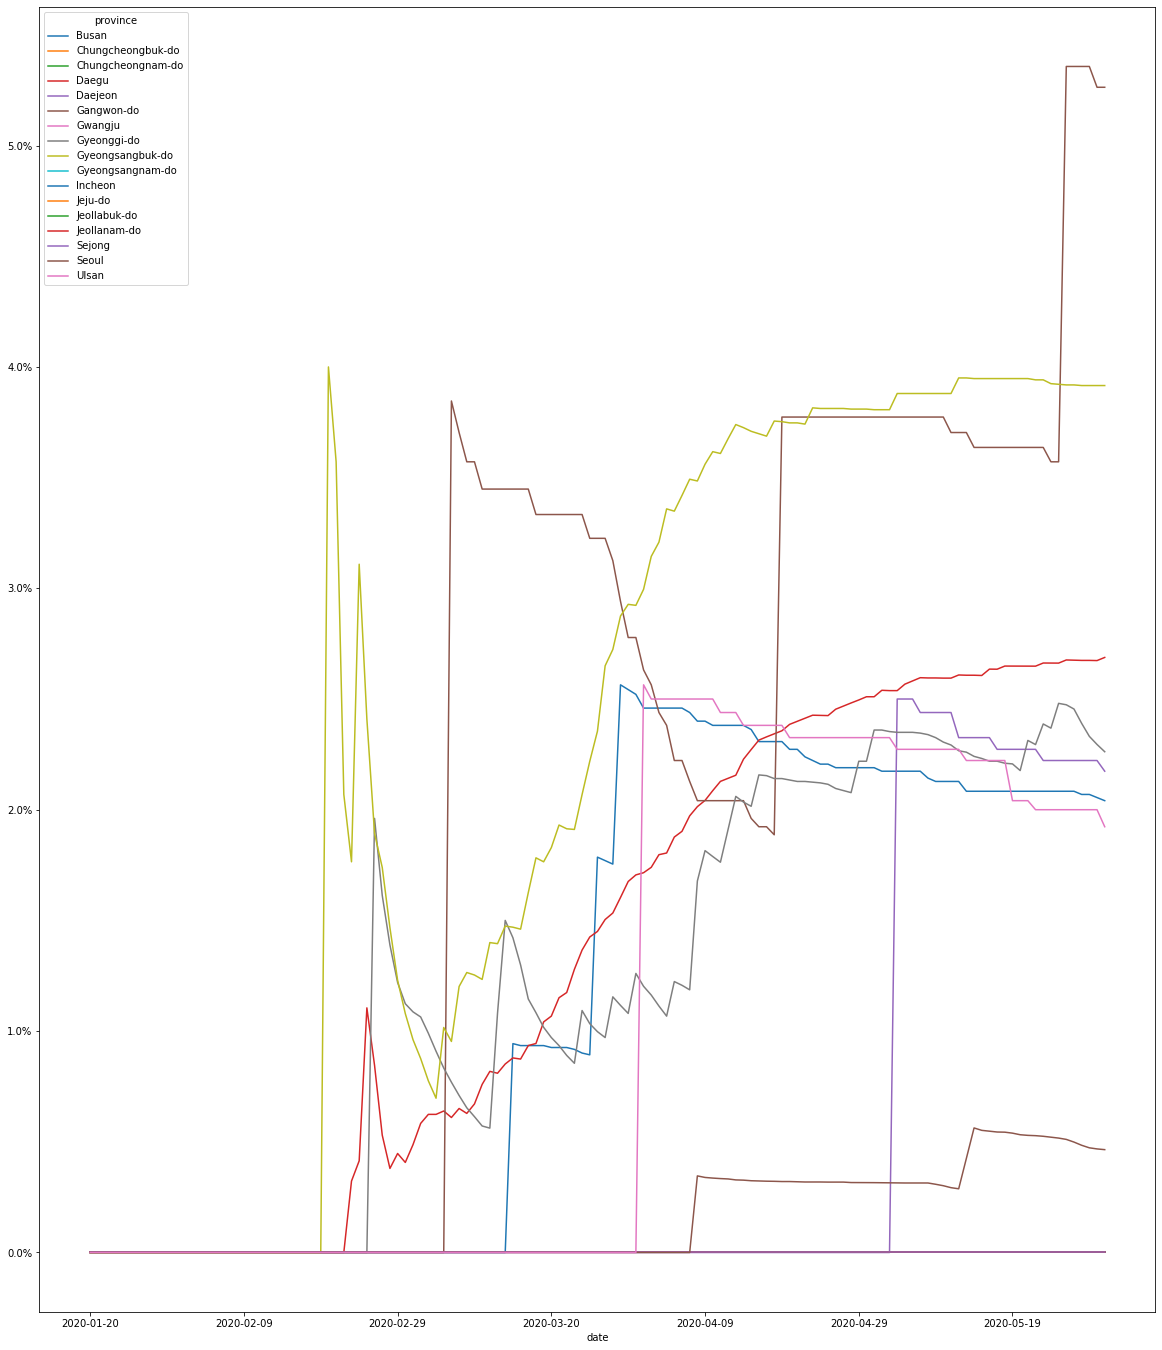

In [63]:
province['mortality_rate'] = province['deceased']/province['confirmed'] * 100
province.groupby(['date','province'])['mortality_rate'].sum() .unstack('province', fill_value=0).plot(legend=True, figsize=(20,24))
plt.gca().set_yticklabels(['{:.1f}%'.format(x) for x in plt.gca().get_yticks()]) 

order = pd.DataFrame()
order['province'] = province['province'].unique()
size = list(province.loc[province['date'] == '2020-05-31', 'mortality_rate'])
order['mortality_rate'] = size
order = order.sort_values(by=['mortality_rate'],ascending=False)
print(order)

表為約2個月間的每100人死亡數，勉強能看出各省分都是疫情突然爆發來不及應對而造成高死亡率。
圖為每日(累計死亡數/累計確診數)比率，即每日男女每百人死亡數。  
以下將死亡率較高的地區分成，先爆發地區和後爆發地區分開看

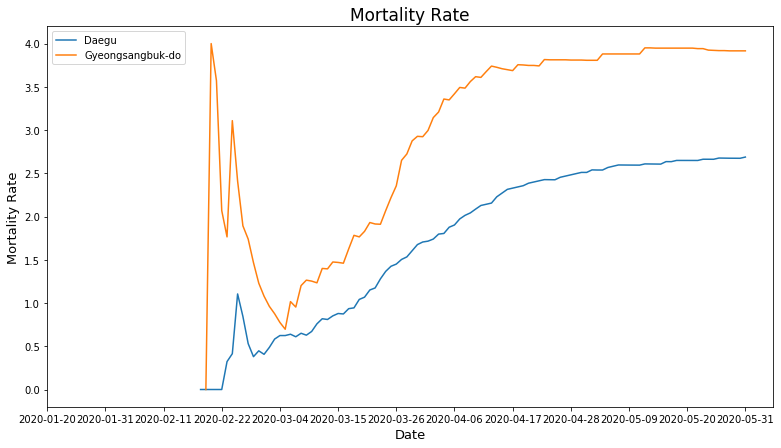

In [67]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Mortality Rate', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Mortality Rate', size=13)
plt.plot(province.date.unique(),  province.loc[(province.province=='Daegu'), 'mortality_rate'], label='Daegu')
plt.plot(province.date.unique(),  province.loc[(province.province=='Gyeongsangbuk-do'), 'mortality_rate'], label='Gyeongsangbuk-do')
plt.gca().set_yticklabels(['{:.1f}%'.format(x) for x in plt.gca().get_yticks()]) 

plt.legend(loc='upper left')
ax.set_xticks(ax.get_xticks()[::11])

死亡率爆發增長後漸趨平緩，沒有再2次失控。

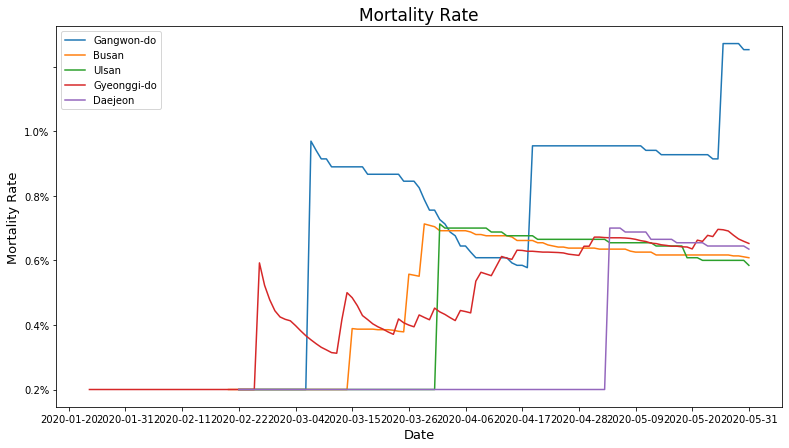

In [71]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Mortality Rate', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Mortality Rate', size=13)
plt.gca().set_yticklabels(['{:.1f}%'.format(x) for x in plt.gca().get_yticks()]) 

plt.plot(province.date.unique(),  province.loc[(province.province=='Gangwon-do'), 'mortality_rate'], label='Gangwon-do')
plt.plot(province.date.unique(),  province.loc[(province.province=='Busan'), 'mortality_rate'], label='Busan')
plt.plot(province.date.unique(),  province.loc[(province.province=='Ulsan'), 'mortality_rate'], label='Ulsan')
plt.plot(province.date.unique(),  province.loc[(province.province=='Gyeonggi-do'), 'mortality_rate'], label='Gyeonggi-do')
plt.plot(province.date.unique(),  province.loc[(province.province=='Daejeon'), 'mortality_rate'], label='Daejeon')
plt.legend(loc='upper left')

ax.set_xticks(ax.get_xticks()[::11])

Gangwon-do地區死亡率多次爆發增長，顯然當地缺乏警戒。其餘地區則沒有再2次失控。